---

# <center> Data Science Checkpoint 3
## <center> Análise Preditiva utilizando dados musicais

#### <center> É possível prever a popularidade de uma música?

---

# Projeto final de análise de dados

### Integrantes: 
* Gabriel Genaro Dalaqua - RM551986
* Paloma Mirela dos Santos - RM551321


# CP 3 - 2 Semestre


## Orientações:

Organizar e realizar análise de dados conforme as etapas que trabalhamos:

* Ask - Estabelecer questões de pesquisa, definir escopo

* Get - Obter dados de fontes confiáveis

* Explore - Combinar dados, limpar, revisitar questões

* Model - Experimentar diferentes modelos de IA (ML) com Scikit-learn e estatística descritiva

* Communicate - Finalizar relatório com todo o processo de análise, avançar na qualidade dos gráficos texto (MARKDOWN), e testar com usuário não envolvido no projeto para obter insights

### Requisitos:

* Elaborar 10 questões de pesquisa sobre os dados (escopo) a serem respondidas/encontradas, questões avançadas

* Antes de cada célula de código, explicar o que vai ser feito (MARKDOWN)

Lembre-se: Alguém que não programa deve ser capaz de ler seu notebook de análise e entender o que está ocorrendo (MARKDOWN, Gráficos, tabelas, etc...)

* Depois das células de código explicar o que o código mostra, gráfico, tabela, valores, etc... (MARKDOWN)

* Para modelagem de ML (Machine Learning - IA) utilizar e comparar os resultados de no mínimo 2 algoritmos, um de regressão e outro de classificação do Scikit-learn, ML supervisionada. 

* Explicar o label/tag utilizado na aprendizagem (fit) do seu modelo

* Separe os dados em 70% para treinamento e o demais para testes

* Explicar os passos de limpeza dos dados no data frame Pandas

* Analisar os dados de forma visual com estatística descritiva

* Criar visualizações INCRÍVEIS (avançadas) com Seaborn, Hvplot, etc...

* Atenção na qualidade, organização, sequência e coerência do relatório em Jupyter notebook

* Finalizar com uma conclusão geral da análise

---

### Descrição Inicial do Projeto:

Os seres humanos têm uma grande associação com Canções e Música. A música pode melhorar o humor, diminuir a dor e a ansiedade, e facilitar oportunidades de expressão emocional. Pesquisas sugerem que a música pode beneficiar nossa saúde física e mental de várias formas.

Recentemente, diversos estudos foram realizados para entender as músicas e sua popularidade com base em certos fatores. Essas amostras de músicas são analisadas e seus parâmetros são registrados em tabelas. O objetivo principal é prever a Popularidade da Música.

Nosso projeto final é simples, mas desafiador, com a meta de prever a popularidade de uma música com base em características como energia, acústica, instrumentalidade, vivacidade, capacidade de dança, etc. O conjunto de dados é grande, e sua complexidade surge devido à forte multicolinearidade entre as variáveis.

### Fonte de dados: 
O conjunto de dados foi obtido no Kaggle.
https://www.kaggle.com/datasets/yasserh/song-popularity-dataset


### Nossos objetivos:
* Entender o Conjunto de Dados e realizar uma limpeza (se necessário).
* Construir modelos de Regressão para prever a popularidade das músicas.
* Avaliar os modelos e comparar suas respectivas pontuações, como R², RMSE, etc.

---

# <center> Estrutura do projeto:

1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

Realizando os Imports necessários para o projeto:

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display


from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('song_data.csv')
df.drop(['song_name'], axis=1, inplace=True)

target = 'song_popularity'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1m\033[0m O Dataset contém {} colunas & {} ocorrências.'.format(df.shape[1], df.shape[0]))

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574



 O Dataset contém 14 colunas & 18835 ocorrências.


## Variáveis:

song_name: Nome da música.

song_popularity: Nível de popularidade da música, geralmente uma pontuação que varia de 0 a 100.

song_duration_ms: Duração da música em milissegundos.

acousticness: Medida de propriedades acústicas da música. Valores mais altos indicam maior presença de elementos acústicos.

danceability: Medida da facilidade com que a música pode ser dançada, com valores variando de 0 a 1.

energy: Medida da intensidade e atividade da música, onde valores mais altos indicam maior energia.

instrumentalness: Valor que indica a probabilidade de a música ser instrumental, onde valores altos sugerem ausência de vocais.

key: Representa a tonalidade da música em uma escala de 0 a 11 (cada número representa uma nota musical).

liveness: Estima a presença de um público ao vivo, onde valores acima de 0.8 podem indicar que a música foi gravada ao vivo.

loudness: Nível de volume médio da música em decibéis (dB).

audio_mode: Modalidade da música, com 1 para modo maior e 0 para modo menor.

speechiness: Estima a presença de palavras faladas na música; valores acima de 0.66 indicam que a faixa provavelmente é mais fala do que música.

tempo: Velocidade da música em batidas por minuto (BPM).

time_signature: Assinatura de tempo da música (e.g., 4 representa 4/4, uma métrica comum).

audio_valence: Medida que representa a positividade da música; valores altos indicam um tom mais positivo (alegre), e valores baixos, um tom mais negativo (triste).


Quais são os tipos de dados de cada coluna?

In [3]:
#Quais os tipos de dados de cada coluna?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


Quantidade de valores únicos por coluna:

In [4]:
#Quantos valores únicos temos em cada coluna?

df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

Checando os status gerais de cada coluna

In [5]:
#Checking the stats of all the columns

display(df.describe())

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


---

# <center> 2. Exploratory Data Analysis (EDA)

Nessa etapa do projeto faremos a exploração dos dados.

Utilizaremos de gráficos e visualizações para gerar insights úteis que nos levam tanto às respostas desejadas quanto à geração de mais perguntas que requisitem mais aprofundamento nos dados

In [6]:
eda_df = df.copy()

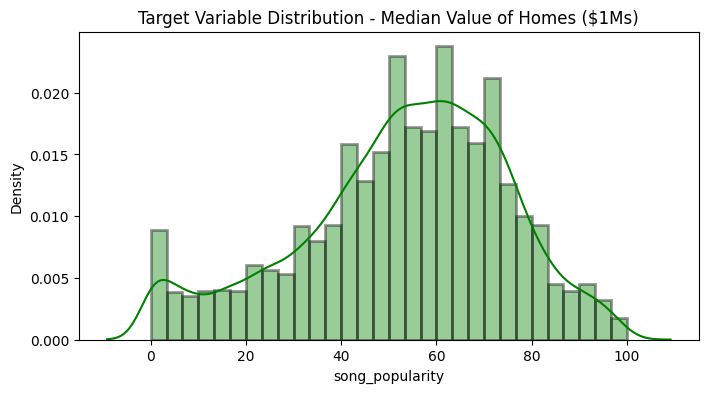

In [7]:
# Distribuição da nossa variável target
plt.figure(figsize=[8,4])
sns.distplot(eda_df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

Vemos que nossa variável alvo (popularidade da música) está distribuida de uma forma quase regular

## Gráficos Gerais

Na seção abaixo utilizaremos de funções que exibam gráficos baseados na distribuição dos dados em cada uma das colunas do nosso dataset.

Dessa forma é possível ter uma visão geral mais interessante sobre como os dados estão distribuidos em cada uma das colunas individualmente.

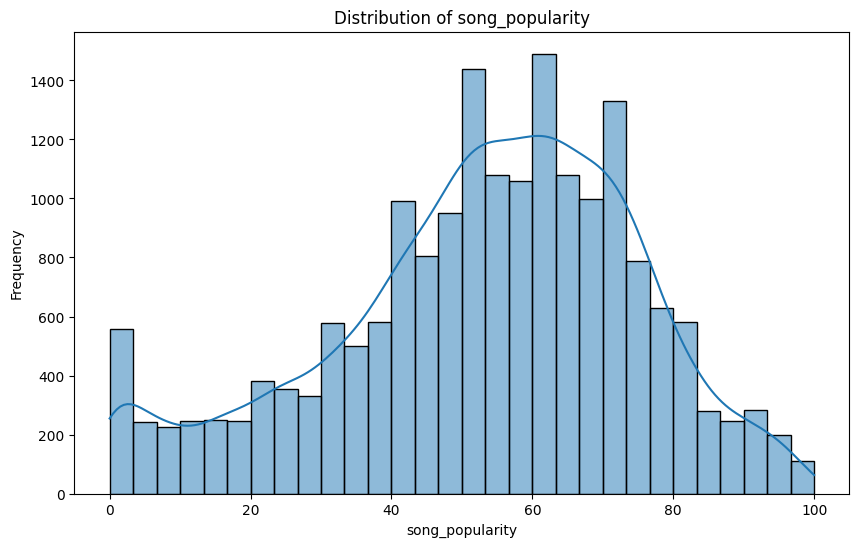

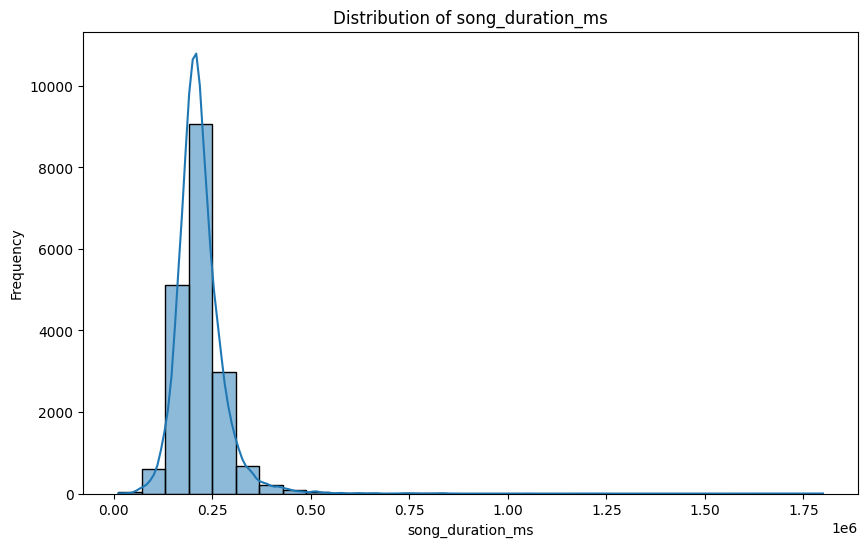

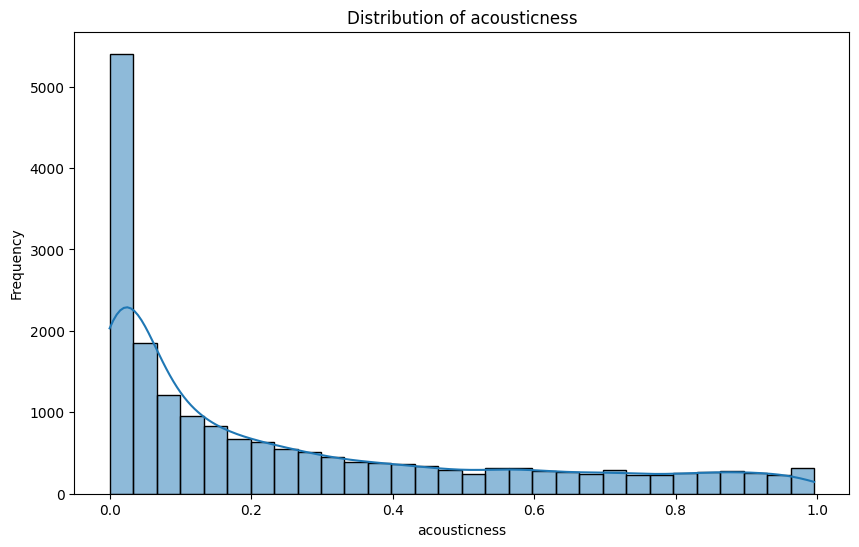

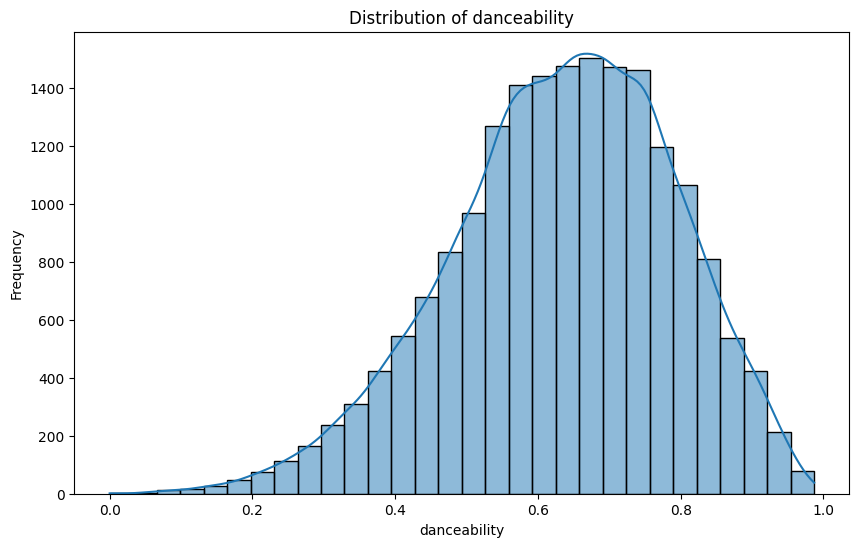

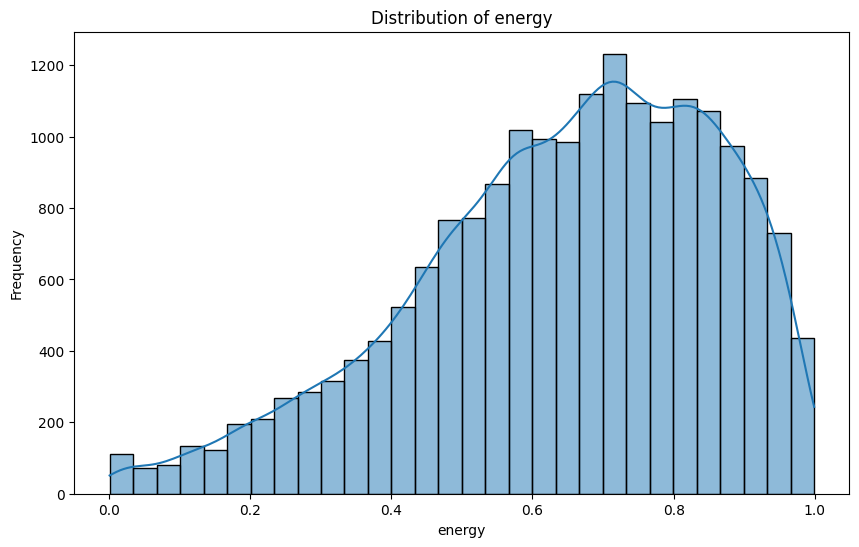

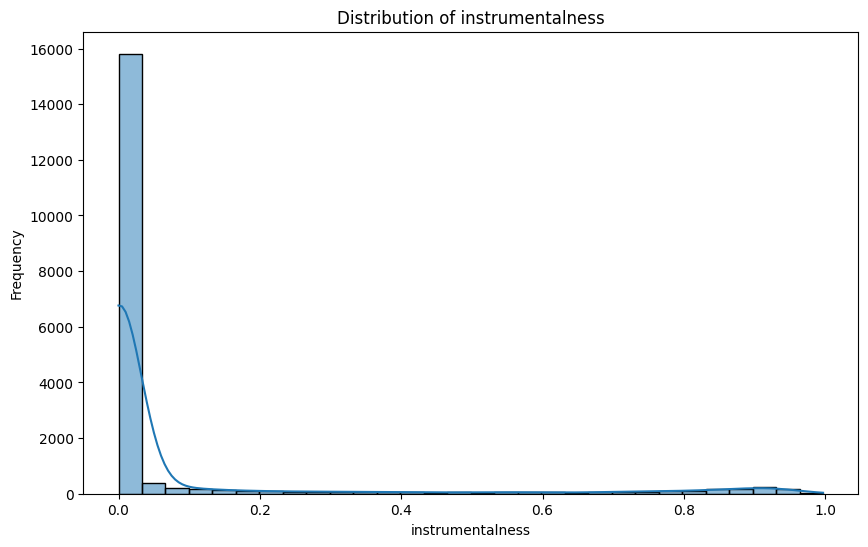

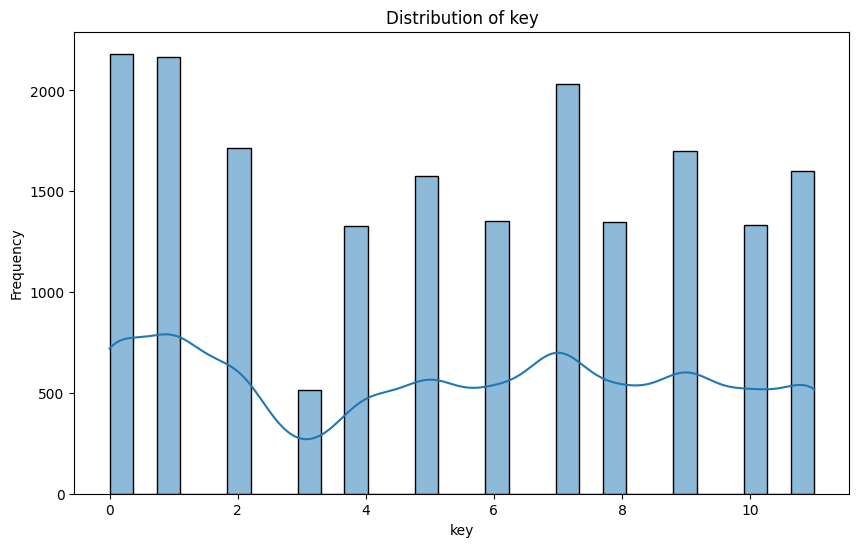

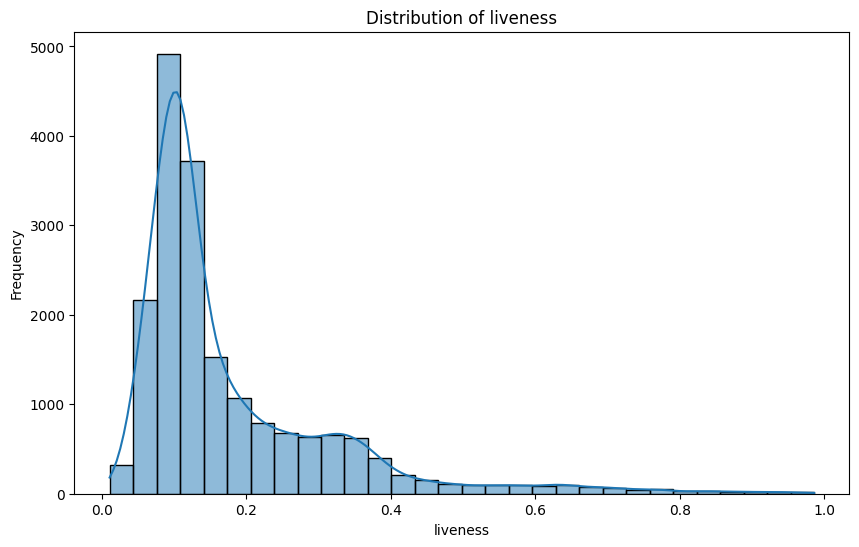

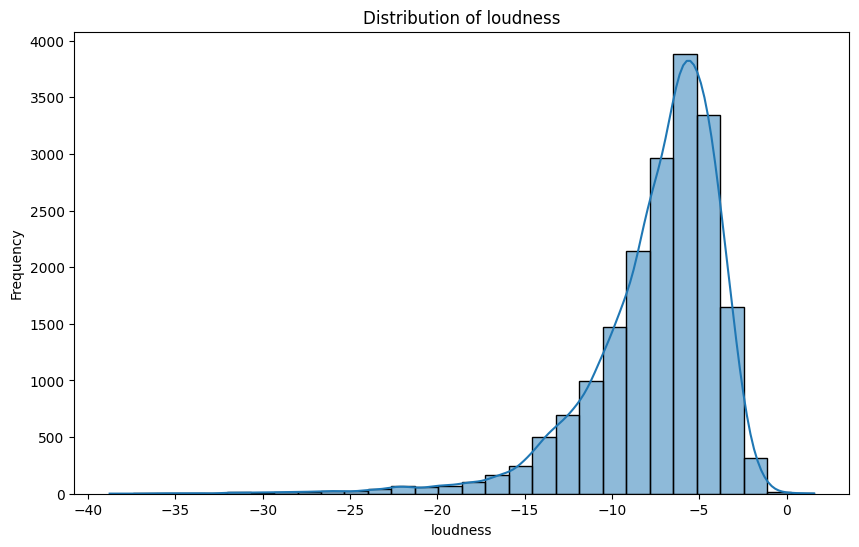

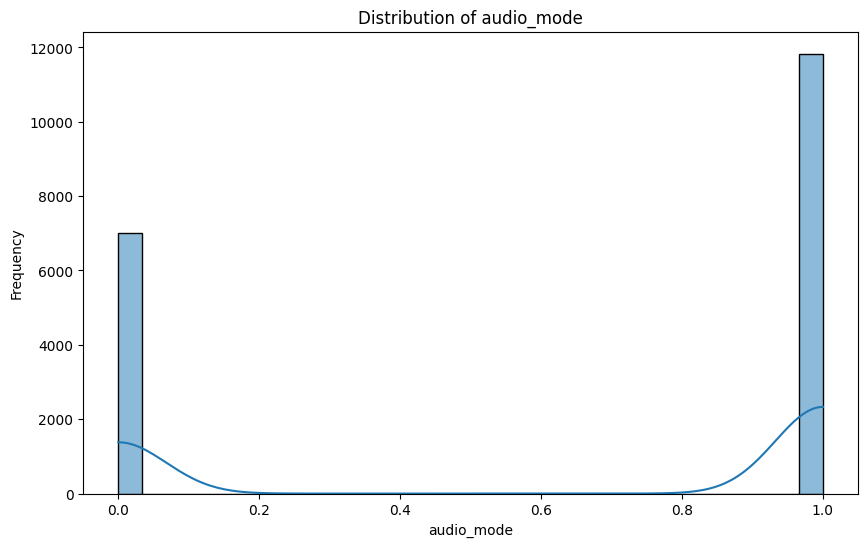

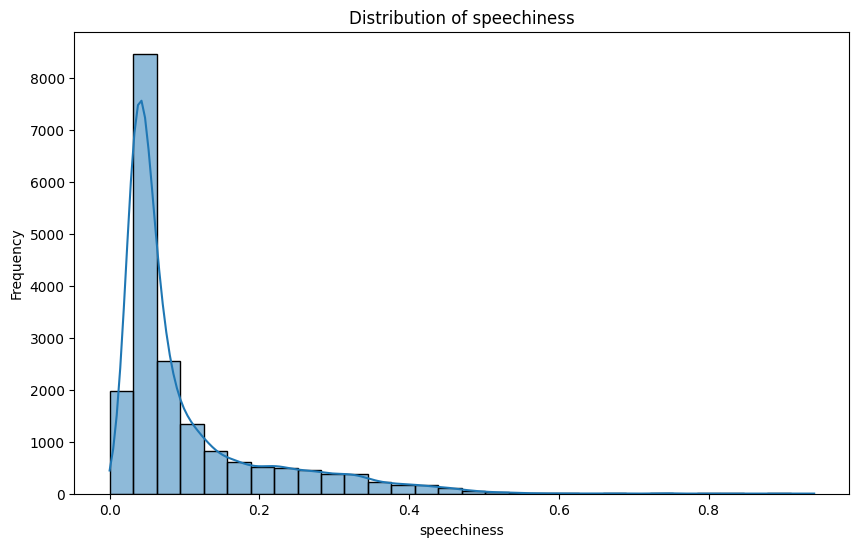

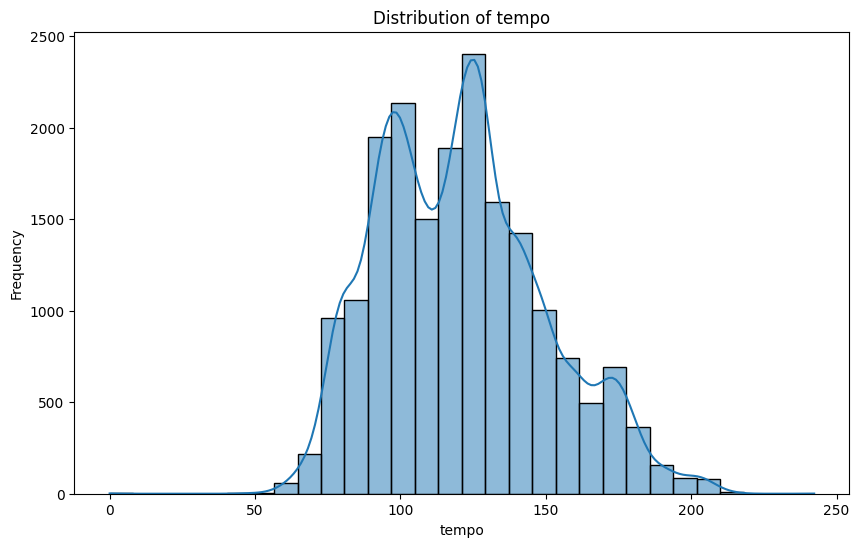

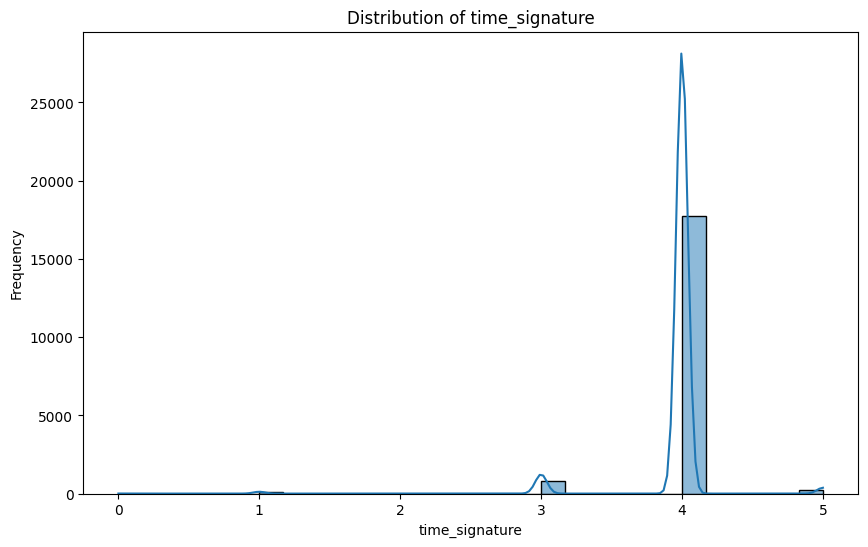

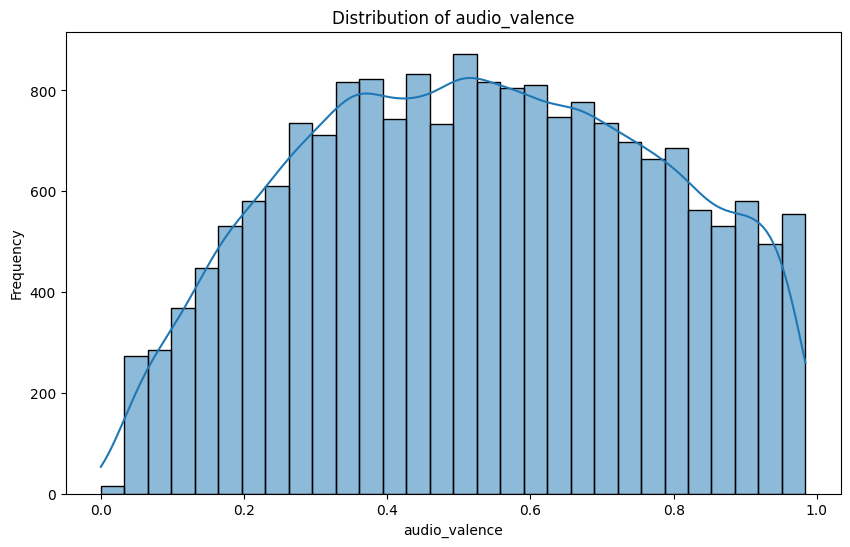

In [8]:
def isCategorical(col):
    # Definição do critério para identificar colunas categóricas
    if len(eda_df[col].unique()) / len(eda_df[col]) < 0.01:
        return True
    else:
        return False

def checkCategory(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            if isCategorical(i):
                plt.figure()  # Cria uma nova figura para cada gráfico
                # Ordenando as categorias pelo valor da contagem
                order = df[i].value_counts().index  # Obtém a ordem das categorias, do menor para o maior
                sns.countplot(x=i, data=df, order=order)
                plt.title(f'Countplot for {i}')
                plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x se necessário
                plt.show()
            else:
                text = " ".join(df[i].dropna().astype(str))  # Une todos os valores da coluna em uma string
                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                plt.title(f'WordCloud for {i}')
                plt.show()
        elif df[i].dtype in ['int64', 'float64']:  # Se for uma coluna numérica
            plt.figure()  # Cria uma nova figura para o gráfico
            # Plotando o histograma com bins ajustados para mostrar intervalos relevantes
            sns.histplot(df[i], kde=True, bins=30)  # Adiciona KDE para suavizar a visualização
            plt.title(f'Distribution of {i}')
            plt.xlabel(i)
            plt.ylabel('Frequency')
            plt.show()
            
            

# Exemplo de como chamar a função com o dataframe
checkCategory(eda_df)


# Questões Mais Específicas sobre os dados:

## Como a acousticness (característica acústica) impacta a popularidade de uma música?

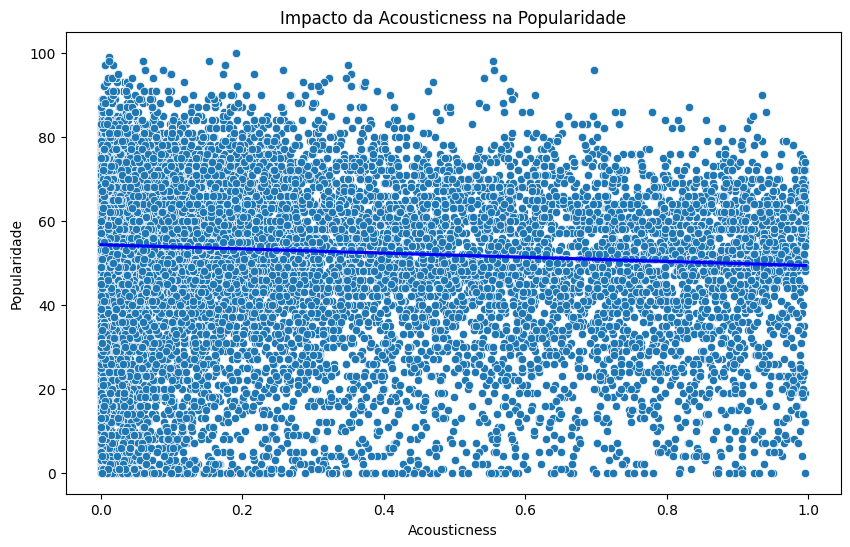

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eda_df, x='acousticness', y='song_popularity')
sns.regplot(data=eda_df, x='acousticness', y='song_popularity', scatter=False, color="blue")
plt.title("Impacto da Acousticness na Popularidade")
plt.xlabel("Acousticness")
plt.ylabel("Popularidade")
plt.show()

## Músicas de alta danceability são geralmente mais populares?

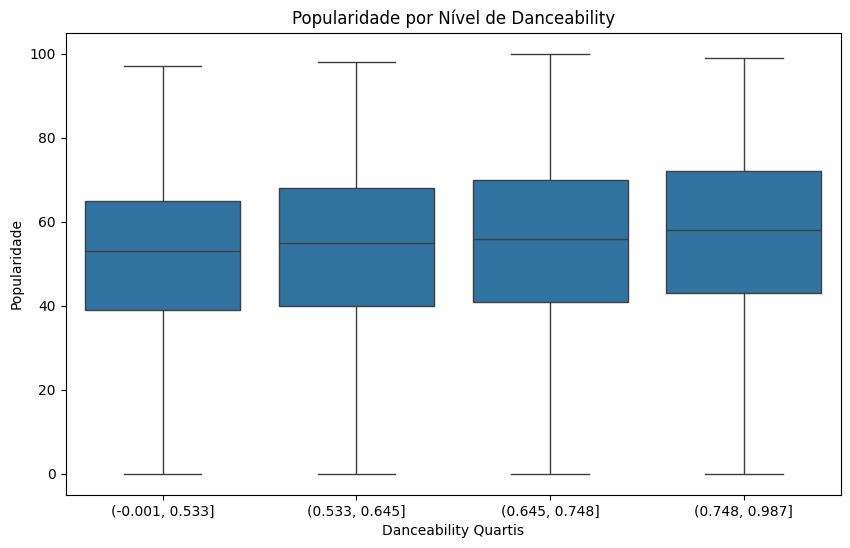

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=eda_df, x=pd.qcut(eda_df['danceability'], q=4), y='song_popularity')
plt.title("Popularidade por Nível de Danceability")
plt.xlabel("Danceability Quartis")
plt.ylabel("Popularidade")
plt.show()


O quanto o uso de instrumentos influencia a popularidade das músicas?

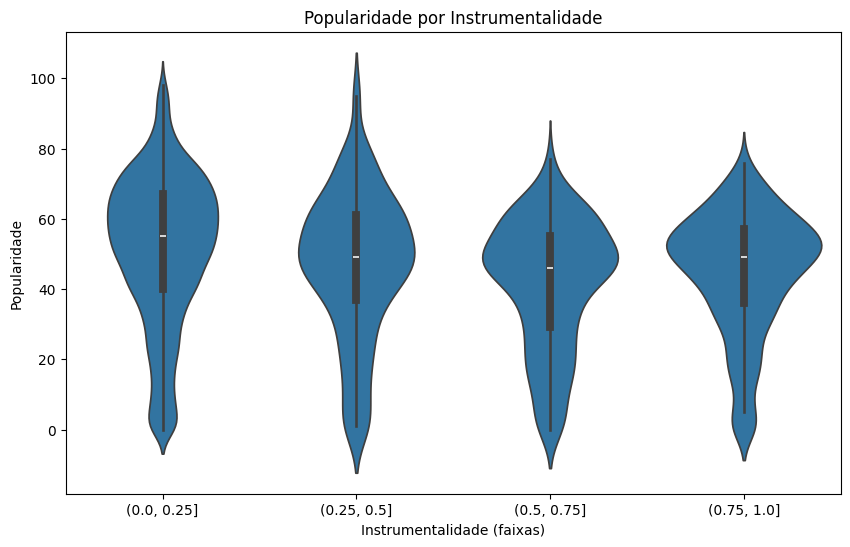

In [11]:
instrumental_bins = pd.cut(eda_df['instrumentalness'], bins=np.linspace(0, 1, 5), duplicates='drop')

plt.figure(figsize=(10, 6))
sns.violinplot(data=eda_df, x=instrumental_bins, y='song_popularity')
plt.title("Popularidade por Instrumentalidade")
plt.xlabel("Instrumentalidade (faixas)")
plt.ylabel("Popularidade")
plt.show()

Há relação entre o tom (key) e a popularidade de uma música?

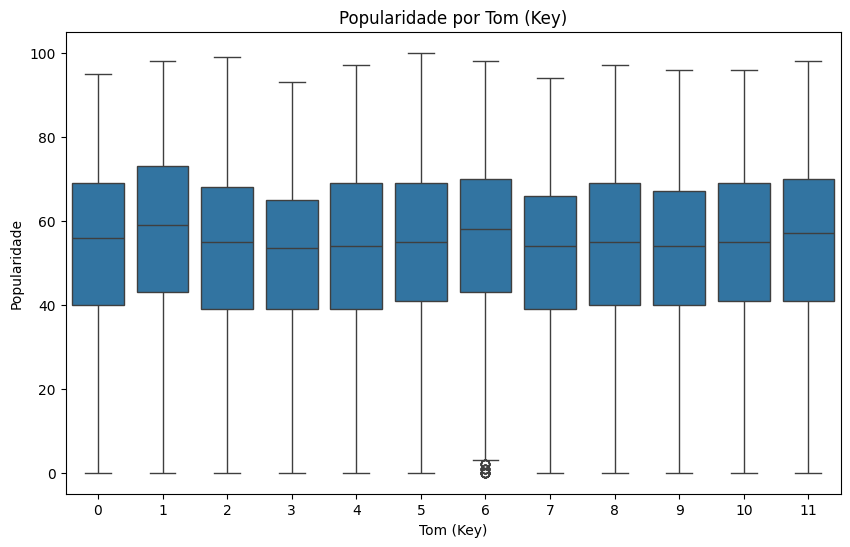

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=eda_df, x='key', y='song_popularity')
plt.title("Popularidade por Tom (Key)")
plt.xlabel("Tom (Key)")
plt.ylabel("Popularidade")
plt.show()

Como o nível de fala (speechiness) afeta a popularidade das músicas?


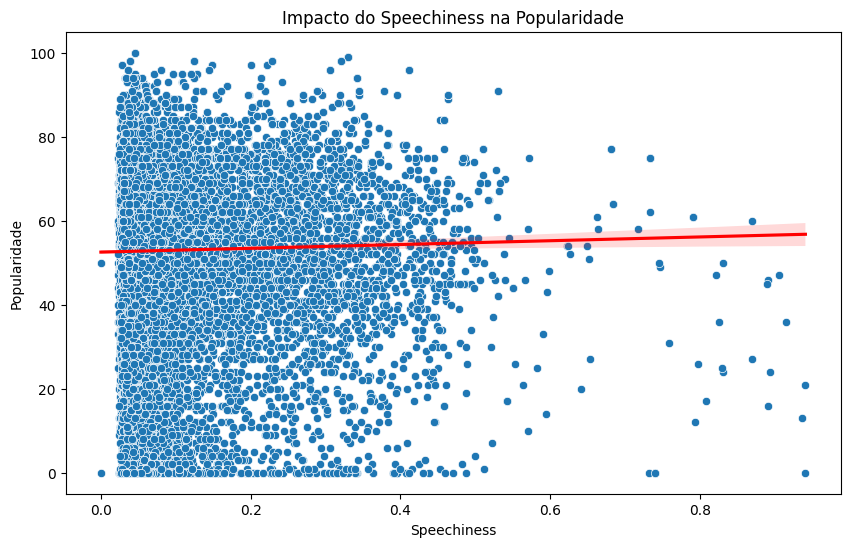

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eda_df, x='speechiness', y='song_popularity')
sns.regplot(data=eda_df, x='speechiness', y='song_popularity', scatter=False, color="red")
plt.title("Impacto do Speechiness na Popularidade")
plt.xlabel("Speechiness")
plt.ylabel("Popularidade")
plt.show()

Existe uma faixa de tempo (BPM) ideal que corresponde a uma maior popularidade?

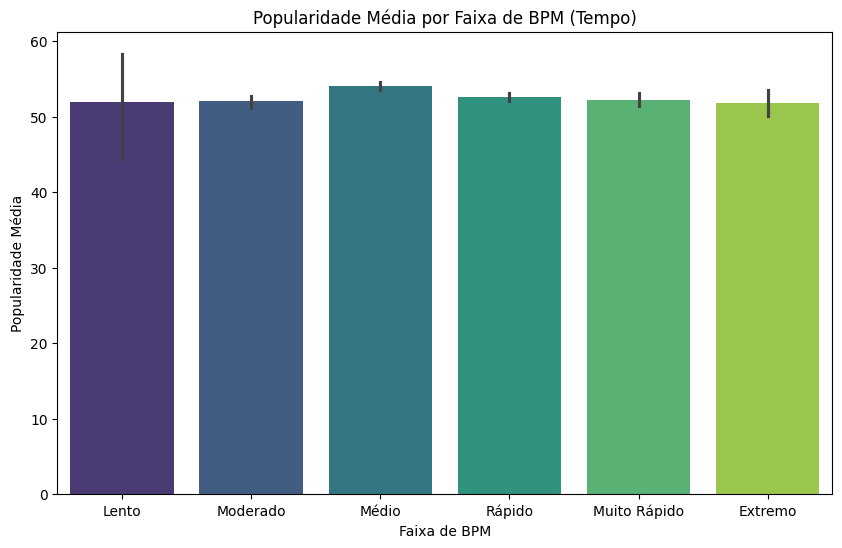

In [14]:
eda_df['tempo_range'] = pd.cut(eda_df['tempo'], bins=[0, 60, 90, 120, 150, 180, 220],
                                  labels=['Lento', 'Moderado', 'Médio', 'Rápido', 'Muito Rápido', 'Extremo'])

plt.figure(figsize=(10, 6))
sns.barplot(data=eda_df, x='tempo_range', y='song_popularity', estimator=np.mean, palette='viridis')
plt.title("Popularidade Média por Faixa de BPM (Tempo)")
plt.xlabel("Faixa de BPM")
plt.ylabel("Popularidade Média")
plt.show()

Qual é a popularidade média de músicas em tonalidades maiores versus menores ao longo dos diferentes níveis de danceability?

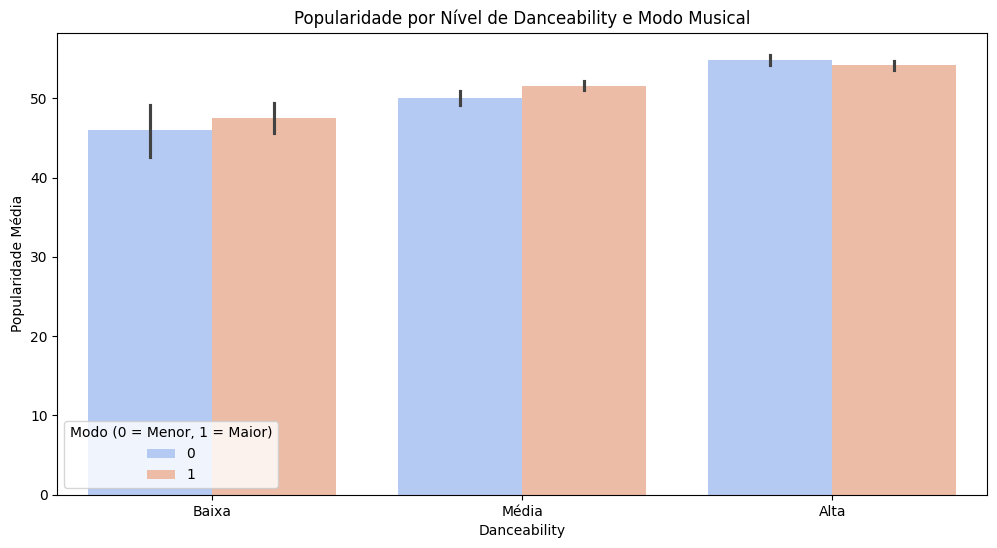

In [15]:
eda_df['danceability_range'] = pd.cut(eda_df['danceability'], bins=[0, 0.3, 0.6, 1],
                                         labels=['Baixa', 'Média', 'Alta'])

plt.figure(figsize=(12, 6))
sns.barplot(data=eda_df, x='danceability_range', y='song_popularity', hue='audio_mode', estimator=np.mean, palette='coolwarm')
plt.title("Popularidade por Nível de Danceability e Modo Musical")
plt.xlabel("Danceability")
plt.ylabel("Popularidade Média")
plt.legend(title="Modo (0 = Menor, 1 = Maior)")
plt.show()

Músicas com maior duração têm uma tendência de popularidade diferente?

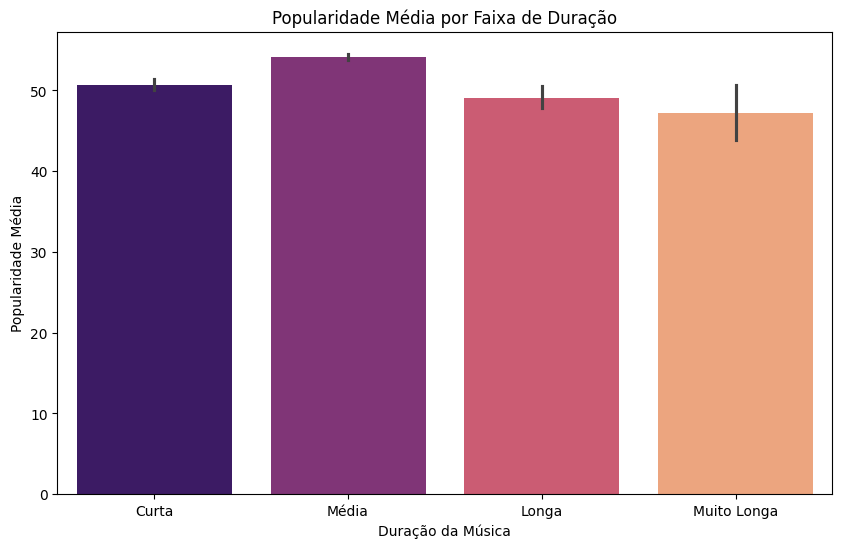

In [16]:
ead_df = df.copy()

ead_df['duration_range'] = pd.cut(ead_df['song_duration_ms'], 
                                     bins=[0, 180000, 300000, 420000, 600000],
                                     labels=['Curta', 'Média', 'Longa', 'Muito Longa'])

plt.figure(figsize=(10, 6))
sns.barplot(data=ead_df, x='duration_range', y='song_popularity', estimator=np.mean, palette='magma')
plt.title("Popularidade Média por Faixa de Duração")
plt.xlabel("Duração da Música")
plt.ylabel("Popularidade Média")
plt.show()

# Análise das colunas categoricas dos dados

Aqui temos uma noção melhor sobre a proporcionalidade de cada item nas colunas categoricas do nosso dataset

In [17]:
def isCategorical(col):
    # Definição do critério para identificar colunas categóricas
    if len(eda_df[col].unique()) / len(eda_df[col]) < 0.01:
        return True
    else:
        return False

def analise_categorica(df, coluna):
    contagem = df[coluna].value_counts()
    proporcao = df[coluna].value_counts(normalize=True) * 100
    return pd.concat([contagem, proporcao], axis=1, keys=['Contagem', 'Proporção (%)'])

for coluna in eda_df.columns:
    # Verifica se a coluna é categórica ou numérica
    if isCategorical(coluna):
        display(Markdown(f"### Análise da Coluna Categórica: `{coluna}`"))
        resultado = analise_categorica(eda_df, coluna)
        display(resultado)
    else:
        display(Markdown(f"### A Coluna `{coluna}` não é categórica e foi ignorada na análise."))

### Análise da Coluna Categórica: `song_popularity`

,Contagem,Proporção (%)
song_popularity,,
58,404,2.144943
52,389,2.065304
55,388,2.059995
60,383,2.033448
63,378,2.006902
...,...,...
98,47,0.249535
97,36,0.191134
93,32,0.169896


### A Coluna `song_duration_ms` não é categórica e foi ignorada na análise.

### A Coluna `acousticness` não é categórica e foi ignorada na análise.

### A Coluna `danceability` não é categórica e foi ignorada na análise.

### A Coluna `energy` não é categórica e foi ignorada na análise.

### A Coluna `instrumentalness` não é categórica e foi ignorada na análise.

### Análise da Coluna Categórica: `key`

,Contagem,Proporção (%)
key,,
0,2182,11.584816
1,2164,11.489249
7,2032,10.788426
2,1715,9.105389
9,1698,9.015131
11,1600,8.494823
5,1574,8.356783
6,1351,7.172817
8,1349,7.162198


### A Coluna `liveness` não é categórica e foi ignorada na análise.

### A Coluna `loudness` não é categórica e foi ignorada na análise.

### Análise da Coluna Categórica: `audio_mode`

,Contagem,Proporção (%)
audio_mode,,
1,11831,62.81391
0,7004,37.18609


### A Coluna `speechiness` não é categórica e foi ignorada na análise.

### A Coluna `tempo` não é categórica e foi ignorada na análise.

### Análise da Coluna Categórica: `time_signature`

,Contagem,Proporção (%)
time_signature,,
4,17754,94.260685
3,772,4.098752
5,233,1.237059
1,73,0.387576
0,3,0.015928


### A Coluna `audio_valence` não é categórica e foi ignorada na análise.

### Análise da Coluna Categórica: `tempo_range`

,Contagem,Proporção (%)
tempo_range,,
Médio,6782,36.013169
Rápido,6459,34.298003
Moderado,2552,13.551402
Muito Rápido,2493,13.238105
Extremo,529,2.809048
Lento,17,0.090272


### Análise da Coluna Categórica: `danceability_range`

,Contagem,Proporção (%)
danceability_range,,
Alta,11318,60.096639
Média,7023,37.290926
Baixa,492,2.612436


## Matriz de correlação Simples

Através dessa simples matriz de correlação já conseguimos estabelecer alguns pontos onde valeria a pena uma investigação mais aprofundada acerca das possibilidades de correlação entre os valores

Porém entraremos mais nos detalhes de correlação na próxima seção

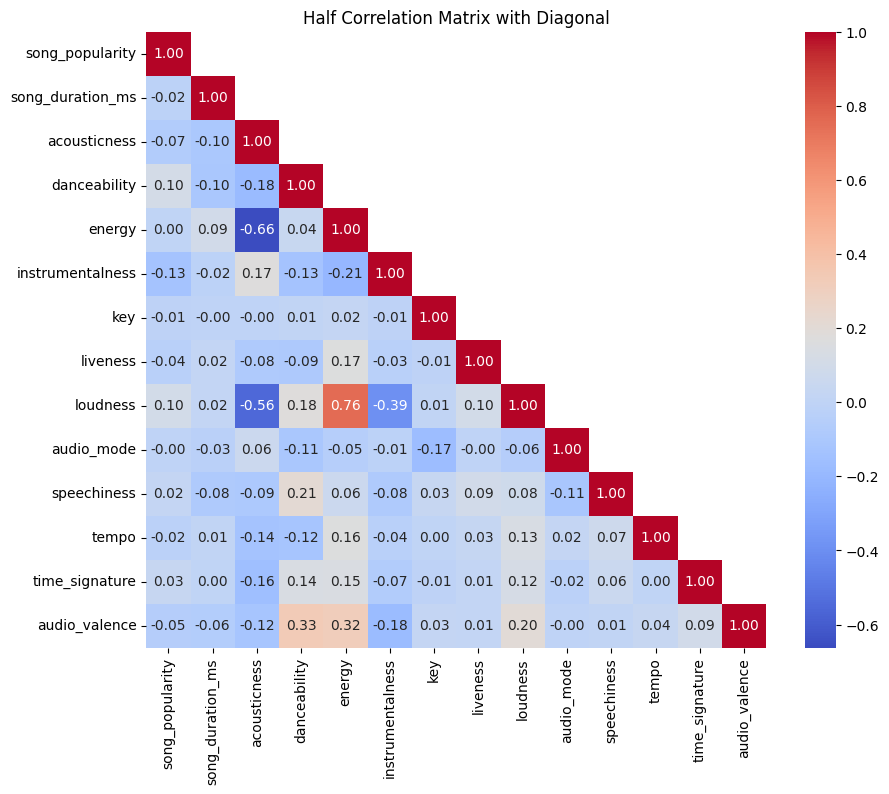

In [18]:
def preprocess_for_correlation(df):
    df_numeric = df.copy()

    # Aplicando Label Encoding em colunas categóricas
    for col in df_numeric.columns:
        if df_numeric[col].dtype == 'object':
            le = LabelEncoder()
            df_numeric[col] = le.fit_transform(df_numeric[col].astype(str))
    
    return df_numeric

def correlation_matrix(df):
    df_processed = preprocess_for_correlation(df)
    corr = df_processed.corr()  # Calcula a matriz de correlação

    # Gerando uma máscara para ocultar a metade superior, exceto a diagonal
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

    # Plotando a matriz de correlação com a máscara
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, mask=mask)
    plt.title('Half Correlation Matrix with Diagonal')
    plt.show()

# Exemplo de como chamar a função com o dataframe
correlation_matrix(df)

---

# <center> 3. Data Preprocessing

---

Remoção de duplicatas do dataframe

In [19]:
counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 3911


Procurando por elementros nulos em cada coluna

In [20]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
song_popularity                   0         0.0
song_duration_ms                  0         0.0
acousticness                      0         0.0
danceability                      0         0.0
energy                            0         0.0
instrumentalness                  0         0.0
key                               0         0.0
liveness                          0         0.0
loudness                          0         0.0
audio_mode                        0         0.0
speechiness                       0         0.0
tempo                             0         0.0
time_signature                    0         0.0
audio_valence                     0         0.0


Aqui nesta etapa transformaremos os valores de texto em valores numéricos.

Fazemos isso para que, dessa forma, seja possível realizar os calculos e estudos em cima desses valores também

In [21]:
df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in df if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape


Dummy Encoding on features:
key
One-Hot Encoding on features:
audio_mode
time_signature


(14924, 27)

## Tratamento de Outliers

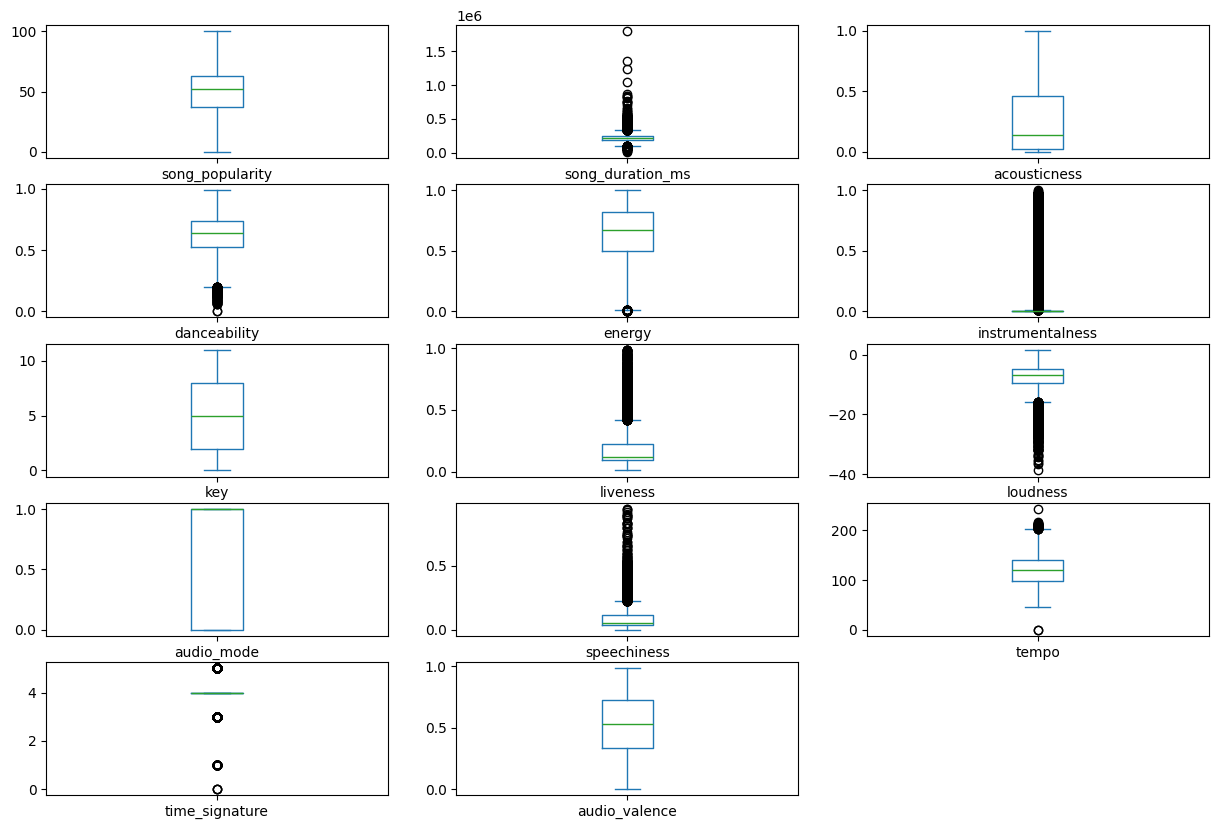

In [22]:
def plot_boxplots(df):
    df.plot(kind='box', subplots=True, layout=(int(np.ceil(len(df.columns)/3)), 3), figsize=(15, 10))
    plt.show()

plot_boxplots(df)

In [23]:

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0  # numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i] <= 16:
        cf.append(nu.index[i])
    else:
        nf.append(nu.index[i])

# Removal of outliers with a less harsh method
df1 = df3.copy()

features1 = [i for i in features if i not in ['CHAS', 'RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # Use a higher multiplier for the IQR method
    lower_bound = Q1 - (3 * IQR)  # Adjusted lower bound
    upper_bound = Q3 + (3 * IQR)  # Adjusted upper bound

    # Keep points within the adjusted bounds
    df1 = df1[(df1[i] <= upper_bound) & (df1[i] >= lower_bound)]
    
df1 = df1.reset_index(drop=True)

display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,True,0.0294,...,False,False,True,False,False,False,False,False,True,False
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,False,0.0498,...,False,False,False,False,False,False,False,False,True,False
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,True,0.1070,...,False,False,False,False,False,False,False,False,True,False
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,True,0.0313,...,False,False,False,False,True,False,False,False,True,False
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,False,0.1240,...,False,False,False,False,False,False,False,False,True,False



Inference:
Before removal of outliers, The dataset had 14924 samples.
After removal of outliers, The dataset now has 11026 samples.


## Como ficou nosso dataset depois de tanta limpeza e remoções?

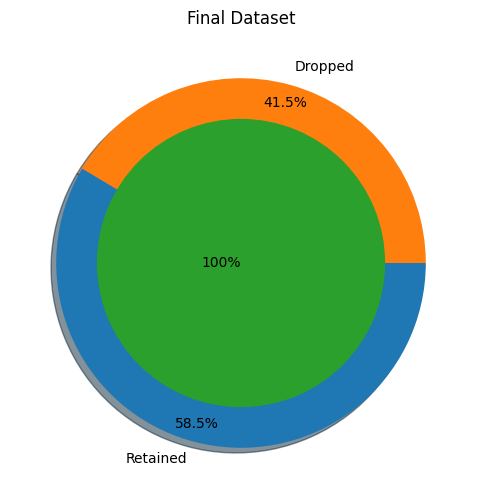


Inference: After the cleanup process, 7809 samples were dropped, while retaining 41.46% of the data.


In [24]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

---

# <center> 4. Data Manipulation

## Separação entre dados de treinamento e dados de Teste

In [25]:

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (11026, 26) (11026,) 
Training set  --->  (7718, 26) (7718,) 
Testing set   --->  (3308, 26)  (3308,)


Aqui realizaremos o feature scaling em ambos os conjuntos de dados (teste e treinamento)

In [26]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,...,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03,7.718000e+03
mean,6.881714e-17,-4.603153e-17,8.745991e-17,-4.142838e-17,-5.984099e-17,-2.844749e-16,-3.461571e-16,1.841261e-17,8.676944e-17,-6.573303e-16,...,7.825361e-18,-6.858698e-17,3.682523e-18,-2.301577e-17,5.339658e-17,3.130144e-17,-2.393640e-17,-8.285676e-17,-9.850748e-17,-3.038081e-17
std,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,...,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00
min,-3.012751e+00,-9.209395e-01,-3.492052e+00,-3.141438e+00,-3.308381e-01,-1.384550e+00,-4.260067e+00,-1.331266e+00,-8.559054e-01,-2.566561e+00,...,-2.685020e-01,-3.571251e-01,-2.794343e-01,-3.263791e-01,-2.665556e-01,-3.001883e-01,-5.585082e-02,-2.086553e-01,-4.147629e+00,-1.010417e-01
25%,-6.472646e-01,-8.218895e-01,-6.476030e-01,-6.592935e-01,-3.308381e-01,-6.675406e-01,-5.123930e-01,-1.331266e+00,-6.669492e-01,-7.745468e-01,...,-2.685020e-01,-3.571251e-01,-2.794343e-01,-3.263791e-01,-2.665556e-01,-3.001883e-01,-5.585082e-02,-2.086553e-01,2.411016e-01,-1.010417e-01
50%,-1.063908e-01,-4.202605e-01,6.185153e-02,1.241239e-01,-3.298507e-01,-3.993396e-01,2.042515e-01,7.511645e-01,-4.407341e-01,-3.809299e-02,...,-2.685020e-01,-3.571251e-01,-2.794343e-01,-3.263791e-01,-2.665556e-01,-3.001883e-01,-5.585082e-02,-2.086553e-01,2.411016e-01,-1.010417e-01
75%,5.400826e-01,5.955188e-01,7.315236e-01,7.984579e-01,-2.705818e-01,4.224213e-01,7.116234e-01,7.511645e-01,2.432339e-01,6.312085e-01,...,-2.685020e-01,-3.571251e-01,-2.794343e-01,-3.263791e-01,-2.665556e-01,-3.001883e-01,-5.585082e-02,-2.086553e-01,2.411016e-01,-1.010417e-01
max,4.093963e+00,2.641486e+00,2.302932e+00,1.700875e+00,6.679172e+00,4.007466e+00,2.575192e+00,7.511645e-01,3.370325e+00,3.338764e+00,...,3.724366e+00,2.800139e+00,3.578659e+00,3.063922e+00,3.751562e+00,3.331243e+00,1.790484e+01,4.792593e+00,2.411016e-01,9.896904e+00



                                          Standardardization on Testing set                                          


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,...,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000
mean,-0.022840,-0.013054,0.006267,0.006261,-0.020133,0.005353,-0.010883,0.002673,0.024147,0.001825,...,0.024807,0.008423,-0.011187,-0.005592,0.009174,0.003895,-0.017845,-0.013625,0.018216,-0.004326
std,1.004872,0.984594,0.997114,1.011244,0.959507,0.990428,1.018926,0.999372,1.025756,0.988431,...,1.041846,1.010354,0.981457,0.992451,1.015972,1.006030,0.825458,0.968319,0.963737,0.978719
min,-3.311943,-0.920934,-3.339552,-3.130529,-0.330838,-1.294246,-4.184768,-1.331266,-0.849252,-2.238183,...,-0.268502,-0.357125,-0.279434,-0.326379,-0.266556,-0.300188,-0.055851,-0.208655,-4.147629,-0.101042
25%,-0.683531,-0.820089,-0.627712,-0.669210,-0.330838,-0.661219,-0.574653,-1.331266,-0.660296,-0.751835,...,-0.268502,-0.357125,-0.279434,-0.326379,-0.266556,-0.300188,-0.055851,-0.208655,0.241102,-0.101042
50%,-0.112422,-0.423863,0.068482,0.138999,-0.329737,-0.390309,0.208489,0.751164,-0.436742,-0.036741,...,-0.268502,-0.357125,-0.279434,-0.326379,-0.266556,-0.300188,-0.055851,-0.208655,0.241102,-0.101042
75%,0.512561,0.548692,0.724893,0.818291,-0.266704,0.440482,0.724092,0.751164,0.243234,0.663472,...,-0.268502,-0.357125,-0.279434,-0.326379,-0.266556,-0.300188,-0.055851,-0.208655,0.241102,-0.101042
max,4.125034,2.645088,2.296302,1.695917,6.619512,3.971345,2.205217,0.751164,3.370325,3.150362,...,3.724366,2.800139,3.578659,3.063922,3.751562,3.331243,17.904841,4.792593,0.241102,9.896904


---

# <center> 5. Feature Selection/Extraction

Para fazer uma seleção de features utilizando nosso dataset teremos de analisar a matriz de correlação.

Entretanto, se recorda quando falei que a matriz feita lá em cima era simples?
Agora utlizaremos uma matriz mais complexa, utilizaremos cada uma das categorias de nossos dados categoricos como uma feature diferente

Dessa forma teremos mais consistência e validade nos dados

                                       Correlation Matrix                                       


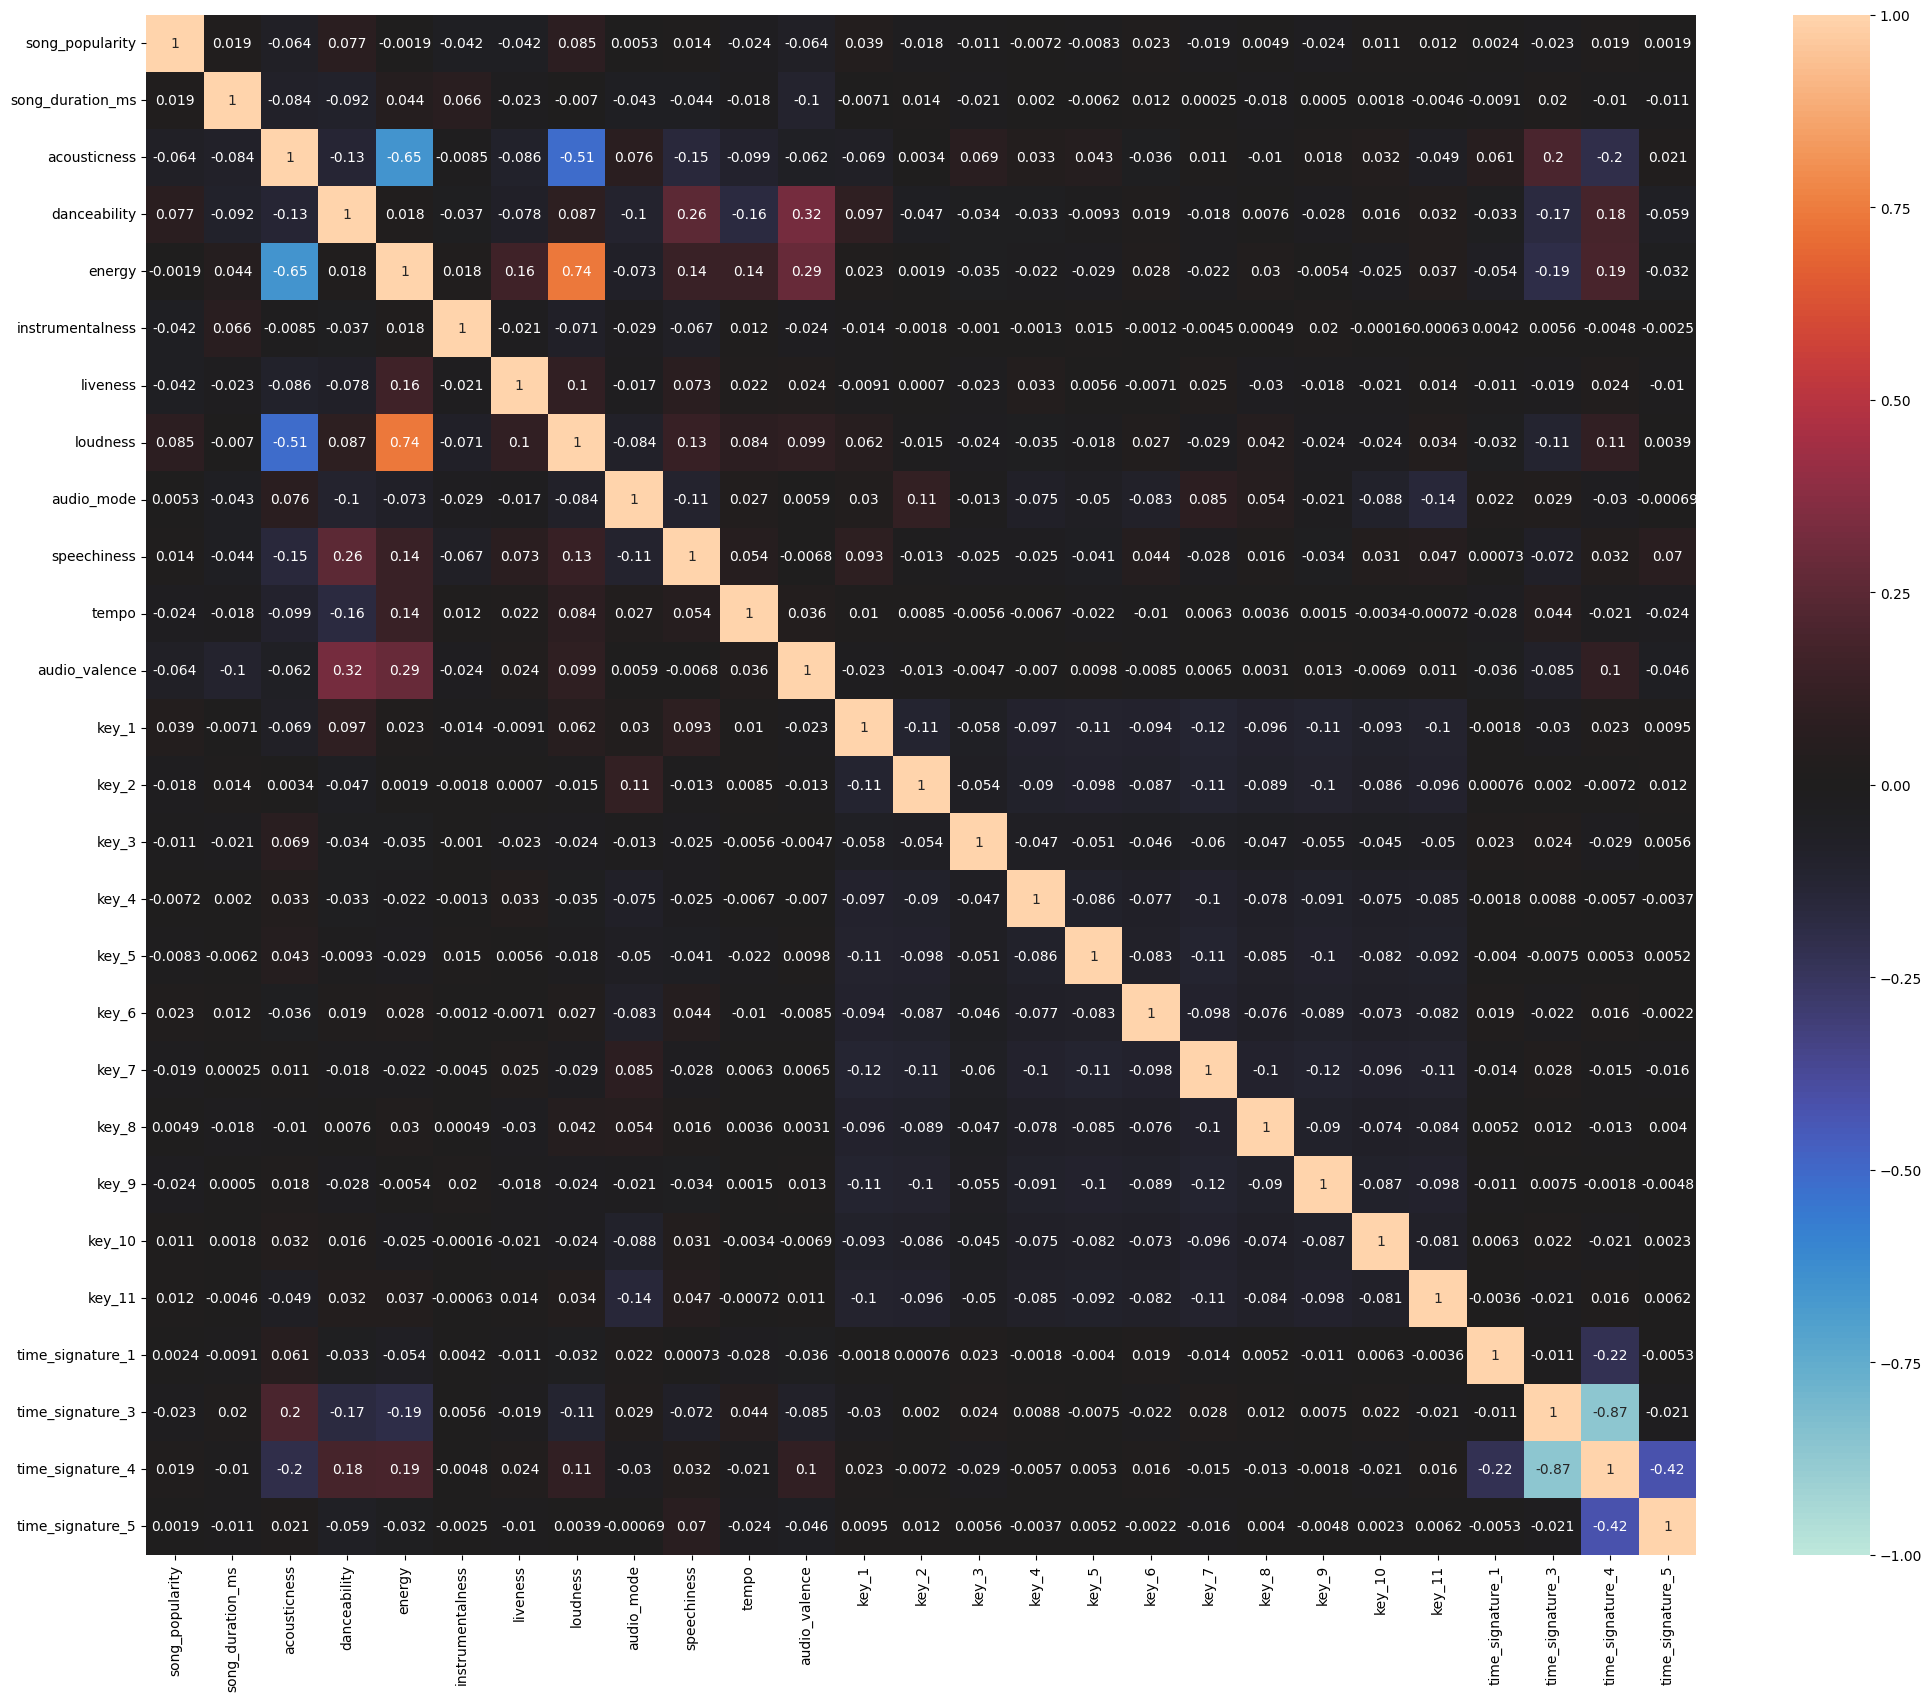

In [27]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

Inferência: Parece haver uma forte multicoerência entre as características. Vamos tentar corrigir isso...


## Uso de APIs para verificação e demonstração das fórmulas que utilizaremos

Um modelo de regressão linear é ajustado utilizando a função ols da API statsmodels. A fórmula especifica que a variável dependente (que é referenciada como target) é modelada como uma combinação linear das variáveis independentes (que são todas as colunas de Train_X).

A parte ' + '.join(i for i in Train_X.columns) cria uma string que contém todos os nomes das colunas de Train_X, separados por +, indicando que todas essas colunas devem ser incluídas como preditores no modelo.

O método fit() ajusta o modelo aos dados.

In [28]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     11.03
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           3.19e-43
Time:                        15:08:25   Log-Likelihood:                -34204.
No. Observations:                7718   AIC:                         6.846e+04
Df Residuals:                    7692   BIC:                         6.864e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           49.8996      0.232    215.117      0.000      49.445      50.354
song_duration_ms     0.5202      0.237      2.197      0.028       0.056       0.984
acousticness        -1.7804      0.322     -5.535      0.000      -2.411      -1.150
danceability         1.4402      0.279      5.164      0.000       0.893       1.987
energy              -3.0932      0.442     -6.998      0.000      -3.960      -2.227
instrumentalness    -0.5281      0.235     -2.244      0.025      -0.989      -0.067
liveness            -0.5286      0.237     -2.230      0.026      -0.993      -0.064
loudness             3.1968      0.360      8.876      0.000       2.491       3.903
audio_mode           0.3520      0.246      1.429      0.153      -0.131       0.835
speechiness         -0.3992      0.250     -1.595      0.111      -0.890       0.091
tempo               -0.0870      0.240     -0.363      0.716      -0.557       0.383
audio_valence       -1.2715      0.277     -4.589      0.000      -1.815      -0.728
key_1                0.4868      0.310      1.569      0.117      -0.121       1.095
key_2               -0.3944      0.298     -1.324      0.186      -0.979       0.190
key_3                0.0378      0.256      0.148      0.883      -0.464       0.540
key_4                0.3040      0.291      1.044      0.296      -0.267       0.875
key_5               -0.1892      0.297     -0.637      0.524      -0.771       0.393
key_6                0.0173      0.287      0.060      0.952      -0.545       0.580
key_7               -0.1961      0.309     -0.634      0.526      -0.802       0.410
key_8                0.1102      0.287      0.384      0.701      -0.453       0.673
key_9               -0.4243      0.302     -1.404      0.160      -1.017       0.168
key_10               0.2966      0.287      1.034      0.301      -0.266       0.859
key_11               0.5278      0.298      1.770      0.077      -0.057       1.113
time_signature_1    -0.0094      0.227     -0.041      0.967      -0.455       0.436
time_signature_3    -0.0627      0.156     -0.403      0.687      -0.368       0.242
time_signature_4     0.0712      0.122      0.583      0.560      -0.168       0.311
time_signature_5    -0.0316      0.215     -0.147      0.883      -0.454       0.390
==============================================================================
Omnibus:                      467.588   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.499
Skew:                          -0.656   Prob(JB):                    1.44e-121
Kurtosis:                       2.919   Cond. No.                     3.66e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

 ---

**Approach:** 
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Feature Elmination using PCA Decomposition

## Variance Inflation Factor

O código realiza um procedimento iterativo para identificar e remover características que apresentam alta multicolinearidade (medida pelo VIF) de um conjunto de dados de treinamento.

Após a remoção das características problemáticas, um modelo de regressão linear é ajustado, e os erros são calculados e visualizados para análise posterior.

Os gráficos resultantes ajudam a entender como o desempenho do modelo varia entre os conjuntos de treinamento e teste, permitindo ajustes adicionais na seleção de características e no modelo.

## 5a. Manual Method - VIF

Dropped Features -->  ['time_signature_3', 'energy', 'key_1', 'acousticness', 'time_signature_4', 'key_7', 'danceability', 'key_11', 'key_9', 'key_2', 'audio_mode', 'loudness', 'key_5', 'key_6', 'song_duration_ms', 'speechiness', 'key_8', 'key_3', 'audio_valence', 'key_4']
                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     11.03
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           3.19e-43
Time:                        15:08:27   Log-Likelihood:                -34204.
No. Observations:                7718   AIC:                         6.846e+04
Df Residuals:                    7692   BIC:                         6.864e+04
Df Model:                          25                                         
Covariance Type

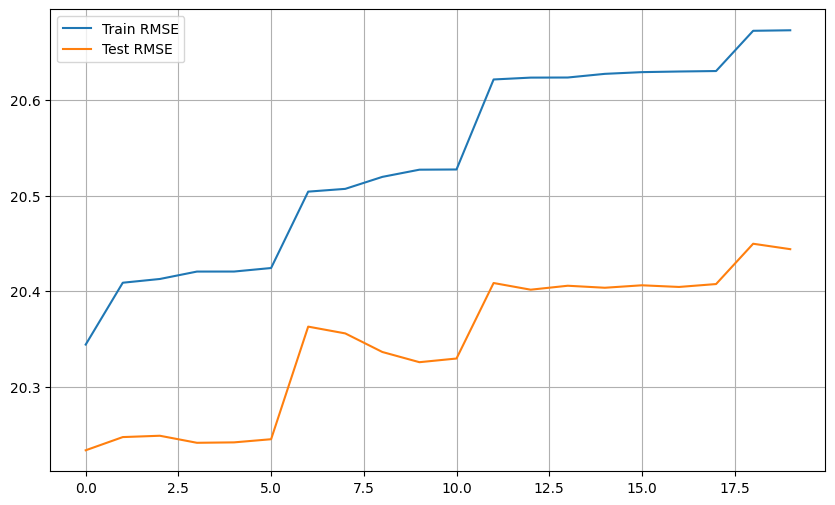

In [29]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]


DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        
print('Dropped Features --> ',DROP)
print(API.summary())



plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## Recursive Feature Elimination

O código implementa um processo de seleção de características usando RFE com um modelo de regressão linear.

Ele calcula e armazena o RMSE para conjuntos de treinamento e teste em cada iteração, conforme o número de características é reduzido.

O RMSE é plotado para permitir a análise da performance do modelo com a diminuição das características, ajudando a identificar a quantidade ideal de características para um bom desempenho.

## 5b. Automatic Method - RFE

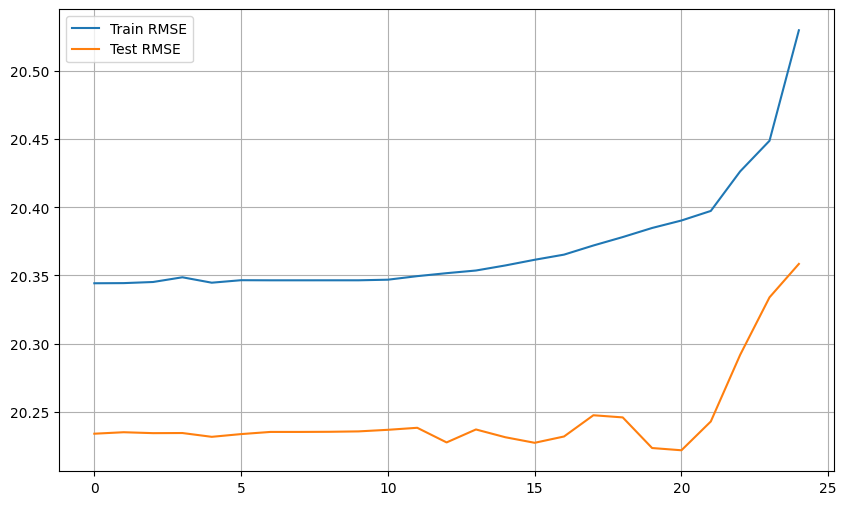

In [30]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5c. Feature Elmination using PCA Decomposition

O código utiliza PCA para analisar a variância explicada pelos componentes principais de um conjunto de dados (Train_X_std).

Um gráfico é gerado mostrando tanto a variância explicada por cada componente individual quanto a variância cumulativa, facilitando a compreensão de quantos componentes são necessários para explicar uma fração significativa da variância total.

A linha de referência indica o ponto em que 90% da variância é explicada, ajudando na escolha do número ideal de componentes principais a serem utilizados.

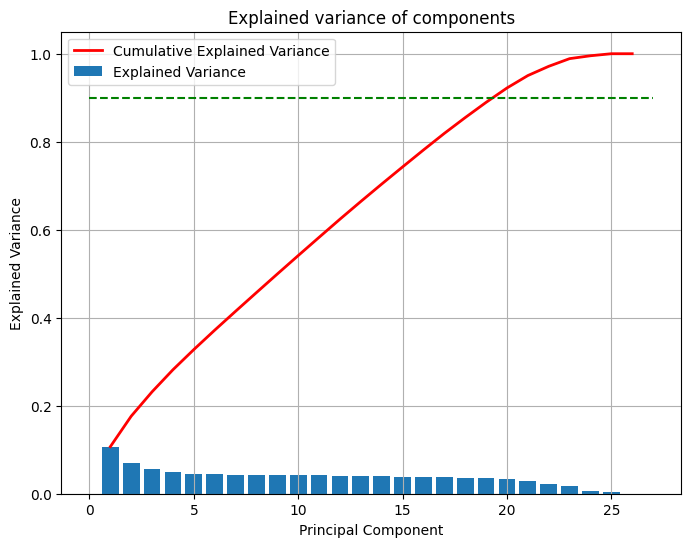

In [31]:
pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

#### Resumo
O código realiza a redução de dimensionalidade usando PCA em um conjunto de dados de treinamento e teste.

Ele treina um modelo de regressão linear para cada iteração, à medida que o número de componentes principais é reduzido.

O RMSE é calculado para cada iteração e armazenado para visualização.

No final, um gráfico mostra a performance do modelo em termos de RMSE, tanto para o conjunto de treinamento quanto para o de teste.

Esse tipo de análise é útil para entender como a redução da dimensionalidade afeta a performance do modelo de aprendizado de máquina, permitindo encontrar um equilíbrio entre complexidade do modelo e desempenho.

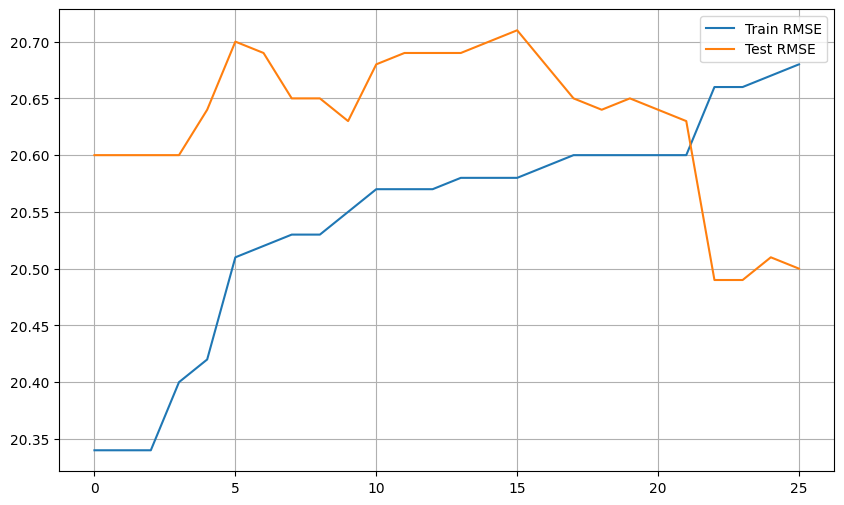

In [32]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

#### Inferência:
Pode-se observar que o desempenho dos modelos é bastante comparável ao eliminar características usando as técnicas VIF, RFE e PCA. Comparando os gráficos de RMSE, os valores ótimos foram encontrados ao eliminar a maioria das características usando a técnica RFE manual. Mas vamos deixar isso de lado por enquanto, pois os algoritmos de aprendizado de máquina avançados cuidam da multicolinearidade.

In [33]:
# #Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-df.shape[1]+10)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

# Train_X_std = Train_X_std.loc[:,rfe.support_]
# Test_X_std = Test_X_std.loc[:,rfe.support_]

20.37196265007913
20.247396085847843


### Explicação
Este código é um exemplo de como usar a técnica de eliminação recursiva de características (RFE) para selecionar as variáveis mais relevantes em um conjunto de dados. Ele treina um modelo de regressão linear com essas variáveis selecionadas, faz previsões e avalia a performance do modelo em termos de RMSE. A seleção de recursos pode melhorar a interpretabilidade do modelo e potencialmente aumentar seu desempenho.

---

# <center> 6. Predictive Modelling

In [34]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,3,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

## Objetivo: 
Agora chegamos ao ponto alto de nosso projeto... vamos tentar diversos modelos de regressão e comparar seus métodos de avaliação para assim decidirmos qual o modelo que mais se adapta aos dados de treinamento e de teste

## 6a. Multiple Linear Regression(MLR)

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_BoomBikes_Share_Prediction/main/mr.png" style="width: 600px;float: left;"/>

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 5.20104647e-01 -1.78252427e+00  1.43814269e+00 -3.09535667e+00
 -5.27297957e-01 -5.30011983e-01  3.19692678e+00  3.52976231e-01
 -3.98796492e-01 -8.74944965e-02 -1.27016613e+00  4.84914654e-01
 -3.97608134e-01  3.91819077e-02  3.05526725e-01 -1.91301274e-01
  2.02168254e-02 -1.95538898e-01  1.11052391e-01 -4.24814532e-01
  2.94296234e-01  5.28890793e-01  2.49110253e+12  8.94615211e+12
  1.01947293e+13  4.47511161e+12]
The Intercept of the Regresion Model was found to be  49.90152647660948


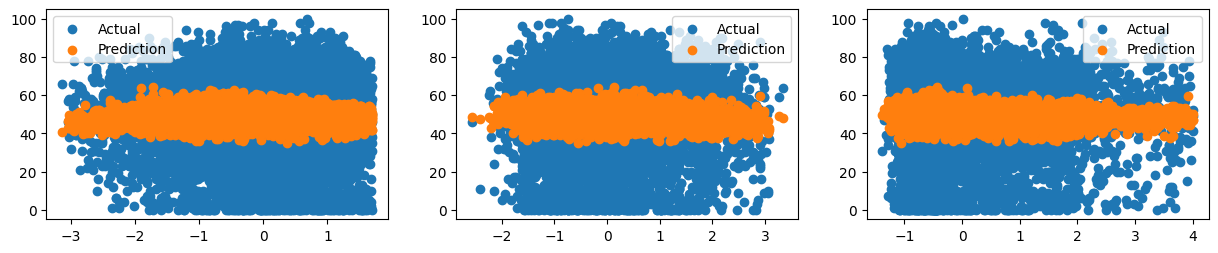



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.034610365160694045
Residual Sum of Squares (RSS) on Training set  ---> 3194390.4852743177
Mean Squared Error (MSE) on Training set       ---> 413.8883759101215
Root Mean Squared Error (RMSE) on Training set ---> 20.344246752094843

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.026478770939436957
Residual Sum of Squares (RSS) on Training set  ---> 1354324.431929986
Mean Squared Error (MSE) on Training set       ---> 409.4088367382062
Root Mean Squared Error (RMSE) on Training set ---> 20.23385372928761

--------------------Residual Plots--------------------


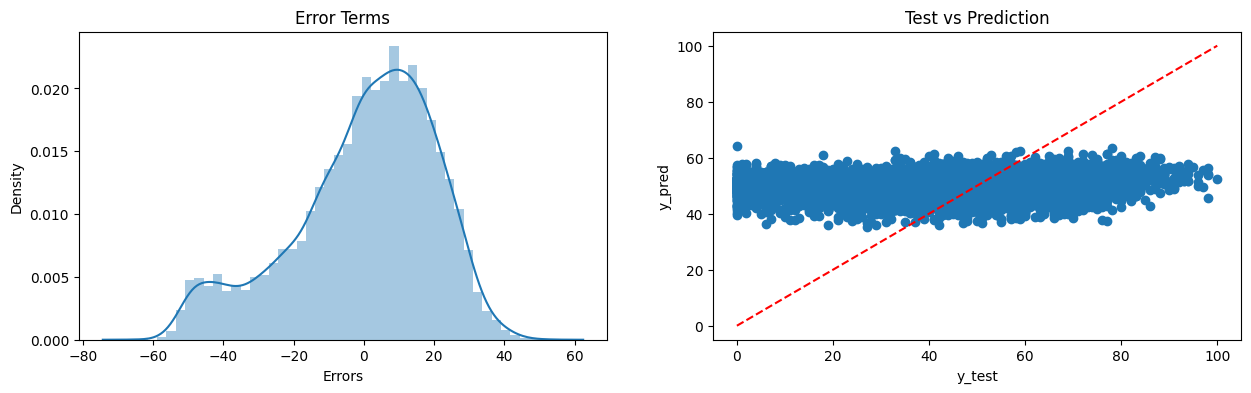

In [35]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_BoomBikes_Share_Prediction/main/ridge.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 5.20104647e-01 -1.78252427e+00  1.43814269e+00 -3.09535667e+00
 -5.27297957e-01 -5.30011983e-01  3.19692678e+00  3.52976231e-01
 -3.98796492e-01 -8.74944965e-02 -1.27016613e+00  4.84914654e-01
 -3.97608134e-01  3.91819077e-02  3.05526725e-01 -1.91301274e-01
  2.02168254e-02 -1.95538898e-01  1.11052391e-01 -4.24814532e-01
  2.94296234e-01  5.28890793e-01  2.49110253e+12  8.94615211e+12
  1.01947293e+13  4.47511161e+12]
The Intercept of the Regresion Model was found to be  49.90152647660948


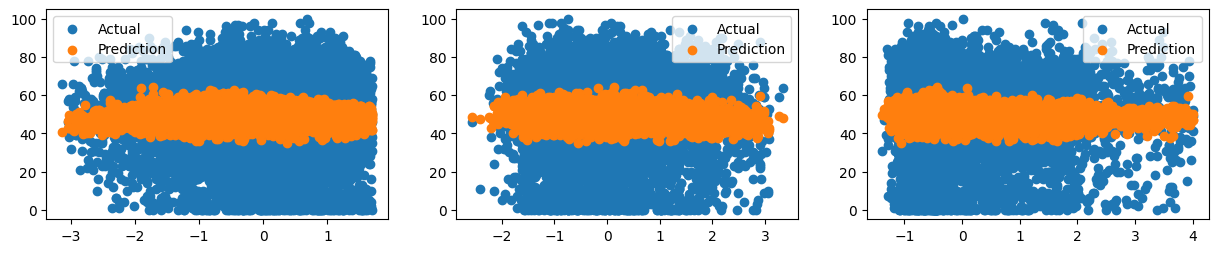



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.03461037123047528
Residual Sum of Squares (RSS) on Training set  ---> 3194390.4651899384
Mean Squared Error (MSE) on Training set       ---> 413.8883733078438
Root Mean Squared Error (RMSE) on Training set ---> 20.344246688138732

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.026493066289702938
Residual Sum of Squares (RSS) on Training set  ---> 1354304.544801128
Mean Squared Error (MSE) on Training set       ---> 409.4028249096518
Root Mean Squared Error (RMSE) on Training set ---> 20.233705170078263

--------------------Residual Plots--------------------


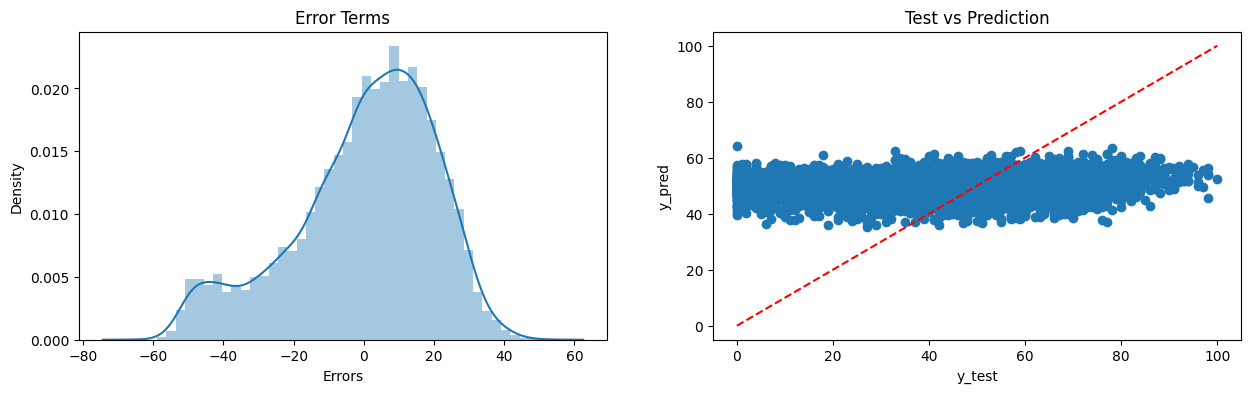

In [36]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_BoomBikes_Share_Prediction/main/lasso.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 5.20104647e-01 -1.78252427e+00  1.43814269e+00 -3.09535667e+00
 -5.27297957e-01 -5.30011983e-01  3.19692678e+00  3.52976231e-01
 -3.98796492e-01 -8.74944965e-02 -1.27016613e+00  4.84914654e-01
 -3.97608134e-01  3.91819077e-02  3.05526725e-01 -1.91301274e-01
  2.02168254e-02 -1.95538898e-01  1.11052391e-01 -4.24814532e-01
  2.94296234e-01  5.28890793e-01  2.49110253e+12  8.94615211e+12
  1.01947293e+13  4.47511161e+12]
The Intercept of the Regresion Model was found to be  49.90152647660948


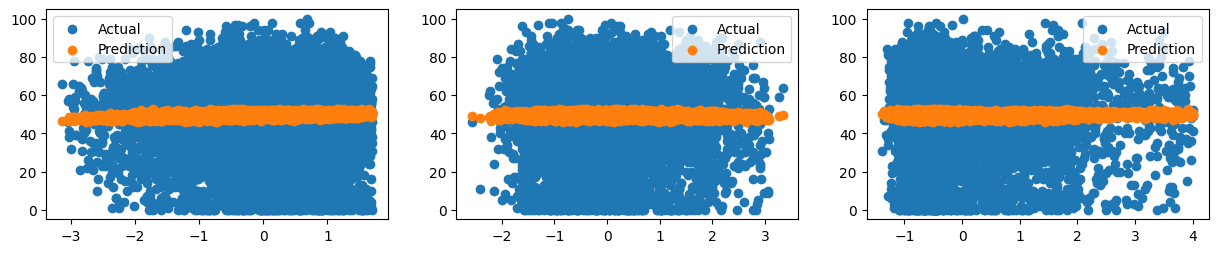



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.012360536270956901
Residual Sum of Squares (RSS) on Training set  ---> 3268013.2373107933
Mean Squared Error (MSE) on Training set       ---> 423.4274730902816
Root Mean Squared Error (RMSE) on Training set ---> 20.577353403445294

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.012546830147642796
Residual Sum of Squares (RSS) on Training set  ---> 1373705.9998252608
Mean Squared Error (MSE) on Training set       ---> 415.2678354973582
Root Mean Squared Error (RMSE) on Training set ---> 20.378121490887185

--------------------Residual Plots--------------------


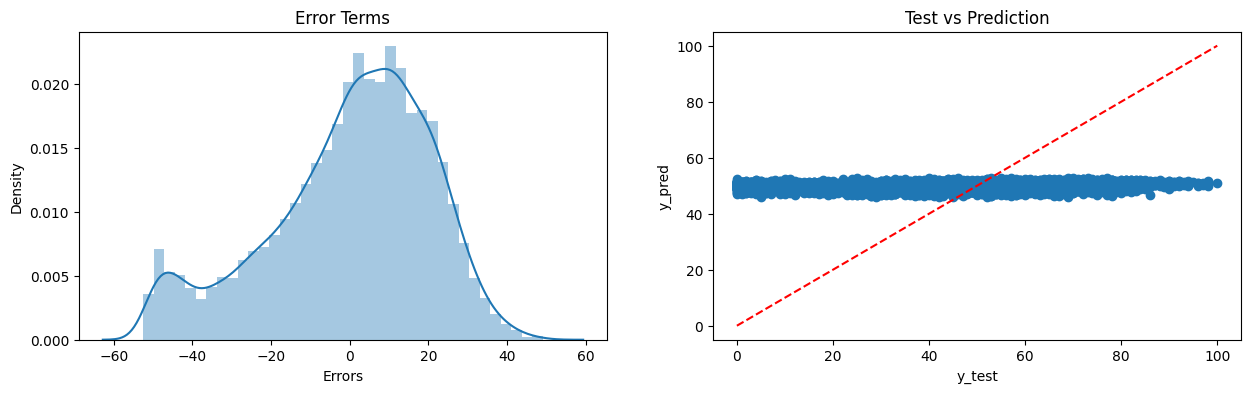

In [37]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_BoomBikes_Share_Prediction/main/en.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 5.20104647e-01 -1.78252427e+00  1.43814269e+00 -3.09535667e+00
 -5.27297957e-01 -5.30011983e-01  3.19692678e+00  3.52976231e-01
 -3.98796492e-01 -8.74944965e-02 -1.27016613e+00  4.84914654e-01
 -3.97608134e-01  3.91819077e-02  3.05526725e-01 -1.91301274e-01
  2.02168254e-02 -1.95538898e-01  1.11052391e-01 -4.24814532e-01
  2.94296234e-01  5.28890793e-01  2.49110253e+12  8.94615211e+12
  1.01947293e+13  4.47511161e+12]
The Intercept of the Regresion Model was found to be  49.90152647660948


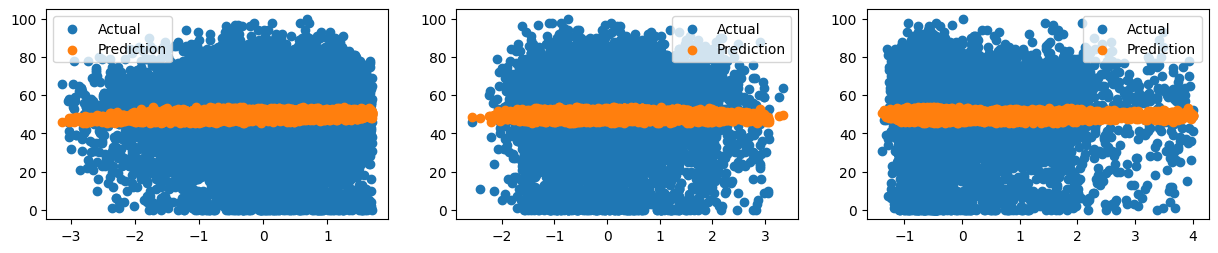



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.016679899358007733
Residual Sum of Squares (RSS) on Training set  ---> 3253720.8398685763
Mean Squared Error (MSE) on Training set       ---> 421.57564652352636
Root Mean Squared Error (RMSE) on Training set ---> 20.532307384303557

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.01624336635904644
Residual Sum of Squares (RSS) on Training set  ---> 1368563.524083413
Mean Squared Error (MSE) on Training set       ---> 413.7132781388794
Root Mean Squared Error (RMSE) on Training set ---> 20.33994292368785

--------------------Residual Plots--------------------


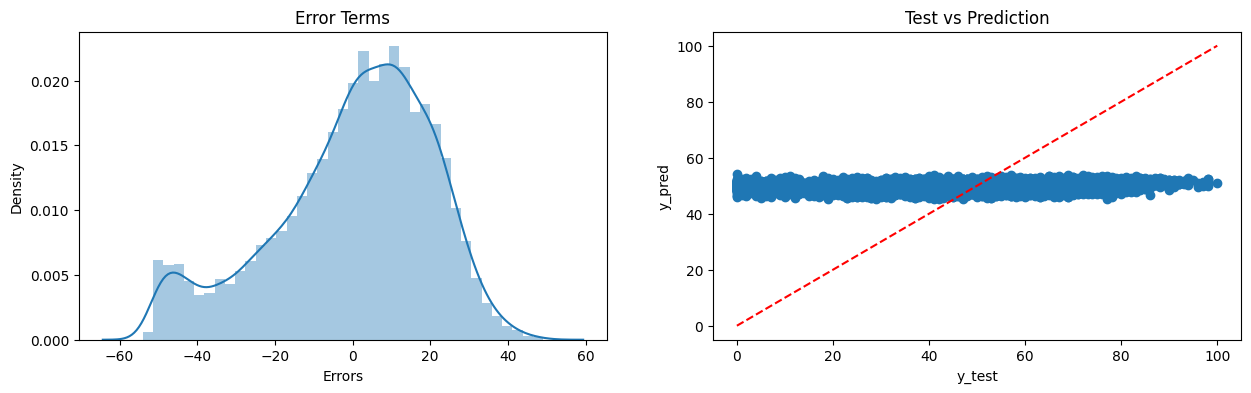

In [38]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_BoomBikes_Share_Prediction/main/pn.png" style="width: 500px;float: left;"/>

Essa pode levar um tempo para processar...

2 Degree
3 Degree
4 Degree


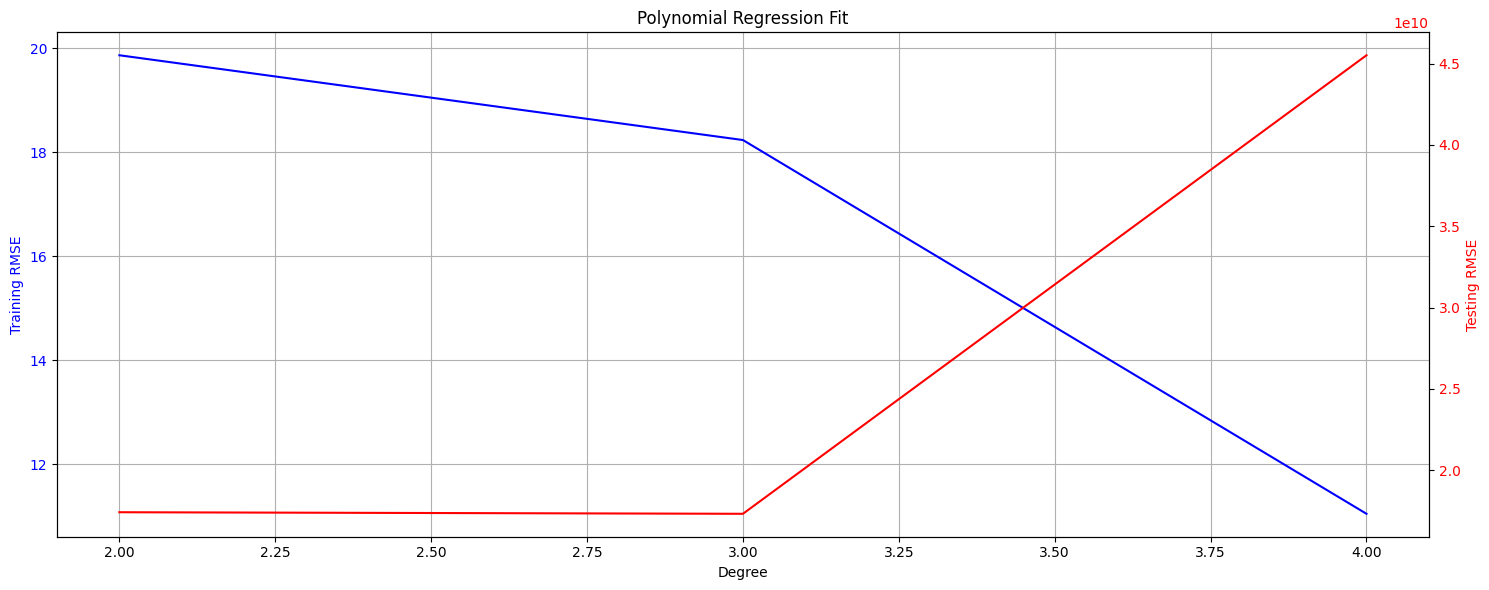

In [39]:
#Checking polynomial regression performance on various degrees


Trr=[]; Tss=[]
n_degree=5

for i in range(2,n_degree):
    print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

fig, ax1 = plt.subplots(figsize=[15, 6])
ax1.plot(range(2, n_degree), Trr, label='Training', color='blue')
ax1.set_ylabel('Training RMSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(range(2, n_degree), Tss, label='Testing', color='red')
ax2.set_ylabel('Testing RMSE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_xlabel('Degree')
ax1.set_title('Polynomial Regression Fit')
ax1.grid()
fig.tight_layout()  # to ensure there's no clipping of ylabel
plt.show()

### Interferência:

Aparentemente a melhor performance veio justamente da regressão de segunda ordem

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 5.20104647e-01 -1.78252427e+00  1.43814269e+00 -3.09535667e+00
 -5.27297957e-01 -5.30011983e-01  3.19692678e+00  3.52976231e-01
 -3.98796492e-01 -8.74944965e-02 -1.27016613e+00  4.84914654e-01
 -3.97608134e-01  3.91819077e-02  3.05526725e-01 -1.91301274e-01
  2.02168254e-02 -1.95538898e-01  1.11052391e-01 -4.24814532e-01
  2.94296234e-01  5.28890793e-01  2.49110253e+12  8.94615211e+12
  1.01947293e+13  4.47511161e+12]
The Intercept of the Regresion Model was found to be  49.90152647660948


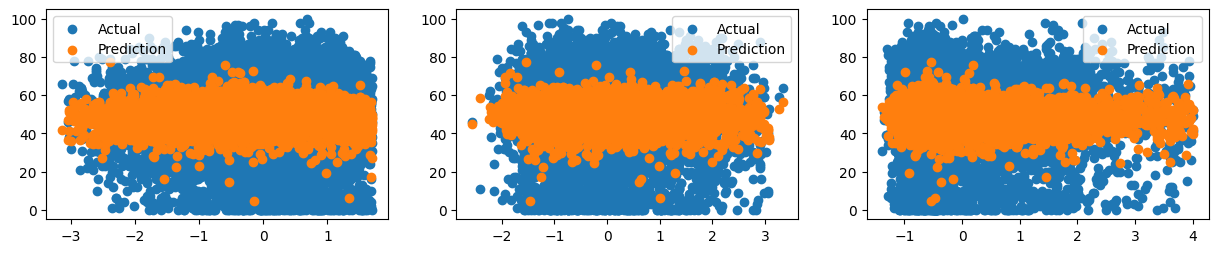



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.07953615196442165
Residual Sum of Squares (RSS) on Training set  ---> 3045734.9572571996
Mean Squared Error (MSE) on Training set       ---> 394.62748863140706
Root Mean Squared Error (RMSE) on Training set ---> 19.865233163278177

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -7.216305226656369e+17
Residual Sum of Squares (RSS) on Training set  ---> 1.003903991508826e+24
Mean Squared Error (MSE) on Training set       ---> 3.0347762742104785e+20
Root Mean Squared Error (RMSE) on Training set ---> 17420609272.383324

--------------------Residual Plots--------------------


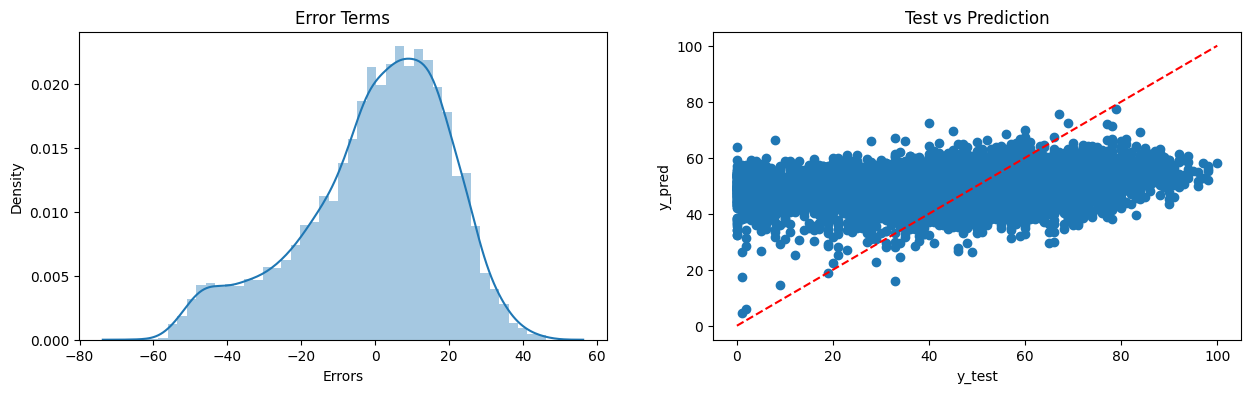

In [43]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparando a performance de cada modelo

In [45]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.034610,2.647877e-02,3.194390e+06,1.354324e+06,413.888376,4.094088e+02,20.344247,2.023385e+01
Ridge Linear Regression (RLR),0.034610,2.649307e-02,3.194390e+06,1.354305e+06,413.888373,4.094028e+02,20.344247,2.023371e+01
Lasso Linear Regression (LLR),0.012361,1.254683e-02,3.268013e+06,1.373706e+06,423.427473,4.152678e+02,20.577353,2.037812e+01
Elastic-Net Regression (ENR),0.016680,1.624337e-02,3.253721e+06,1.368564e+06,421.575647,4.137133e+02,20.532307,2.033994e+01
Polynomial Regression (PNR),0.079536,-7.216305e+17,3.045735e+06,1.003904e+24,394.627489,3.034776e+20,19.865233,1.742061e+10


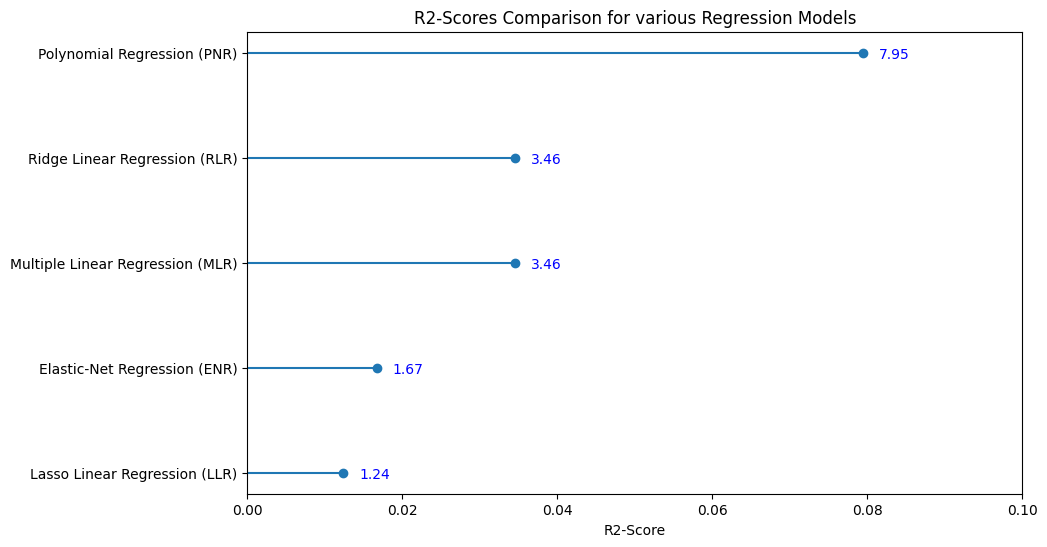

In [46]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.002, i-0.05, str(v*100), color='blue')
plt.xlim([0,0.1])
plt.show()

### Inferência: 

A partir do gráfico acima, fica claro que os modelos de regressão polinomial têm o maior poder de explicação para entender o conjunto de dados.

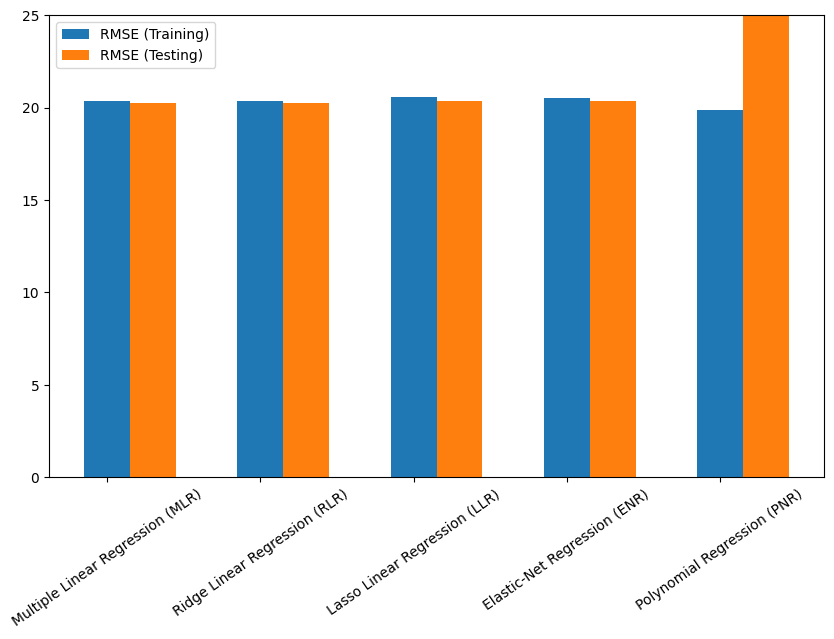

In [47]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,25])
plt.show()

### Inferência:

Quanto menor o RMSE, melhor o modelo! Além disso, o modelo deve ter proximidade com as pontuações de treinamento e teste. Para este problema, pode-se afirmar que as regressões polinomiais estão claramente superajustadas ao problema atual. Surpreendentemente, o modelo de MLR simples apresentou os melhores resultados.

---

# <center> 7. Conclusion

### Aqui estão alguns dos principais resultados do projeto:
 
* Visualizar a distribuição dos dados e suas relações nos ajudou a obter algumas percepções sobre o conjunto de recursos.

* As características apresentaram alta multicolinearidade; portanto, na etapa de extração de recursos, selecionamos os recursos apropriados com a técnica VIF.

* Testar vários algoritmos com hiperparâmetros padrão nos deu uma compreensão do desempenho de vários modelos nesse conjunto de dados específico.

* Embora a regressão polinomial (ordem 2) tenha sido a melhor escolha, é seguro usar o algoritmo de regressão múltipla, uma vez que suas pontuações eram bastante comparáveis e também mais generalizáveis.